# 1. Data Analysis

# Things to investigate #

link to dataset: https://www.kaggle.com/datasets/imuhammad/course-reviews-on-coursera?resource=download

* Missing values
* no. of entries for each institution. Does it make sense to include reviews on modules from diff institutions? How representative is it likely to be
* no. of different modules
* How many entries altogether
* A list of the different modules
* deciding which modules to include and not include
* How many entries would I require to train the model - over 1 million available, I feel that 5 - 10K is okay to get decent metrics but will have to experiment
* Need to find out how many entries there are for each (academic) year
* maybe categorise each module by a department, e.g., CS, Engineering, Biological Sciences analogous to Warwick to make the app as complete as possible
* for MVP, analysis for CS department modules output
* Need to manually label the data using (pre-trainedBERT, other sentiment analysis, lexicon creation)
* label data using pre-trained models or traditional ML methods(Random Forest, SVM) for sentiment and emotion classification (custom emotion label will require finetuning) -> infeasible to label manually - too many data points
* check results without finetuning, if not good enough, finetune for student data (but probably not necessary) --> combine with lexicon creation
* most of the work is required in the opinion mining/topic modelling and the integration of lexicon creation
* Also integration of rating with sentiment
* Topic Modelling
* time series analysis of classification, topics
* to remove neuroeconomics as well

# Current Tasks #
* General Preprocessing
* (Preprocessing for the different experiments will be done during each experiment)
* Since the goal is to produce an MVP by the time of the progress report, it is not necessary to use all the data points for classification.

Converting the dataset with the reviews to a dataframe for analysis

In [1]:
import pandas as pd

# convert saved csv to df
df_reviews = pd.read_csv('~/cs310/datasets/Coursera_reviews.csv')

# print(df.iloc[100:200])

Converting the dataset with more details for each course to a dataframe for analysis

In [2]:
import pandas as pd

# convert saved csv to df
df_courses = pd.read_csv('~/cs310/datasets/Coursera_courses.csv')

# print(df.head())

In [3]:
df_courses

name  \
0                                     Machine Learning   
1                                    Indigenous Canada   
2                            The Science of Well-Being   
3                       Technical Support Fundamentals   
4    Become a CBRS Certified Professional Installer...   
..                                                 ...   
618              Accounting Data Analytics with Python   
619             Introduction to Molecular Spectroscopy   
620                                Managing as a Coach   
621             The fundamentals of hotel distribution   
622                     A Crash Course in Data Science   

                                    institution  \
0                           Stanford University   
1                         University of Alberta   
2                               Yale University   
3                                        Google   
4                     Google - Spectrum Sharing   
..                                          ...   
618  University of Illinois at Urbana-Champaign   
619                 University of Manchester      
620             University of California, Davis   
621                       ESSEC Business School   
622                    Johns Hopkins University   

                                            course_url  \
0      https://www.coursera.org/learn/machine-learning   
1     https://www.coursera.org/learn/indigenous-canada   
2    https://www.coursera.org/learn/the-science-of-...   
3    https://www.coursera.org/learn/technical-suppo...   
4    https://www.coursera.org/learn/google-cbrs-cpi...   
..                                                 ...   
618  https://www.coursera.org/learn/accounting-data...   
619        https://www.coursera.org/learn/spectroscopy   
620  https://www.coursera.org/learn/managing-as-a-c...   
621  https://www.coursera.org/learn/hotel-distribution   
622  https://www.coursera.org/learn/data-science-co...   

                            course_id  
0                    machine-learning  
1                   indigenous-canada  
2           the-science-of-well-being  
3      technical-support-fundamentals  
4            google-cbrs-cpi-training  
..                                ...  
618  accounting-data-analytics-python  
619                      spectroscopy  
620               managing-as-a-coach  
621                hotel-distribution  
622               data-science-course  

[623 rows x 4 columns]

In [4]:
df_reviews

reviews        reviewers  \
0        Pretty dry, but I was able to pass with just t...      By Robert S   
1        would be a better experience if the video and ...   By Gabriel E R   
2        Information was perfect! The program itself wa...       By Jacob D   
3        A few grammatical mistakes on test made me do ...        By Dale B   
4        Excellent course and the training provided was...        By Sean G   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

         date_reviews  rating                 course_id  
0        Feb 12, 2020       4  google-cbrs-cpi-training  
1        Sep 28, 2020       4  google-cbrs-cpi-training  
2        Apr 08, 2020       4  google-cbrs-cpi-training  
3        Feb 24, 2020       4  google-cbrs-cpi-training  
4        Jun 18, 2020       4  google-cbrs-cpi-training  
...               ...     ...                       ...  
1454706  Aug 25, 2020       5       computer-networking  
1454707  Jul 02, 2020       5       computer-networking  
1454708  Jun 20, 2020       5       computer-networking  
1454709  Jun 07, 2020       5       computer-networking  
1454710  Aug 12, 2018       5       computer-networking  

[1454711 rows x 5 columns]

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454558 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Looking for empty reviews

In [6]:
# the number of empty reviews
df_reviews.isnull().sum()

reviews         153
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

Looking at the unique courses

In [7]:
df_reviews['course_id'].unique() # the unique courses

array(['google-cbrs-cpi-training', 'financial-markets-global',
       'introduction-psychology', 'python', 'computer-networking',
       'ai-for-everyone', 'python-crash-course',
       'psychological-first-aid', 'neural-networks-deep-learning',
       'what-is-datascience', 'negotiation-skills',
       'uva-darden-project-management', 'project-management', 'brand',
       'sciwrite', 'food-and-health',
       'html-css-javascript-for-web-developers', 'excel-essentials',
       'negotiation', 'everyday-excel-part-1', 'learning-how-to-learn',
       'gcp-fundamentals', 'wharton-contagious-viral-marketing',
       'python-data', 'private-equity', 'learn-korean',
       'introduction-tensorflow', 'os-power-user',
       'open-source-tools-for-data-science', 'deep-neural-network',
       'diversity-inclusion-workplace', 'clinical-trials',
       'visual-elements-user-interface-design', 'mafash', 'pap',
       'social-psychology', 'project-planning',
       'computational-thinking-problem-s

In [8]:
len(df_reviews['course_id'].unique()) # the number of unique courses

604

Looking at the number of entries for specific modules related to Computer Science to determine which reviews to use

In [9]:
# Filter rows where 'course_id' equals 'python' and get unique values
# based on this, more than enough data to focus solely on CS department initially

unique_count = df_reviews[df_reviews['course_id'] == 'python-data-analysis']['reviews'].nunique() # the number of reviews for the 'python-data-analysis' course

print(unique_count)


4700


# based on previous want to

* remove entries w empty reviews
* make a copy of both datasets and:
    * drop the reviewer column
    * drop modules unrelated to CS
* look at which institutions the module is from
* reviews by date - get date range to plot

Looking at the Number of Reviews overtime

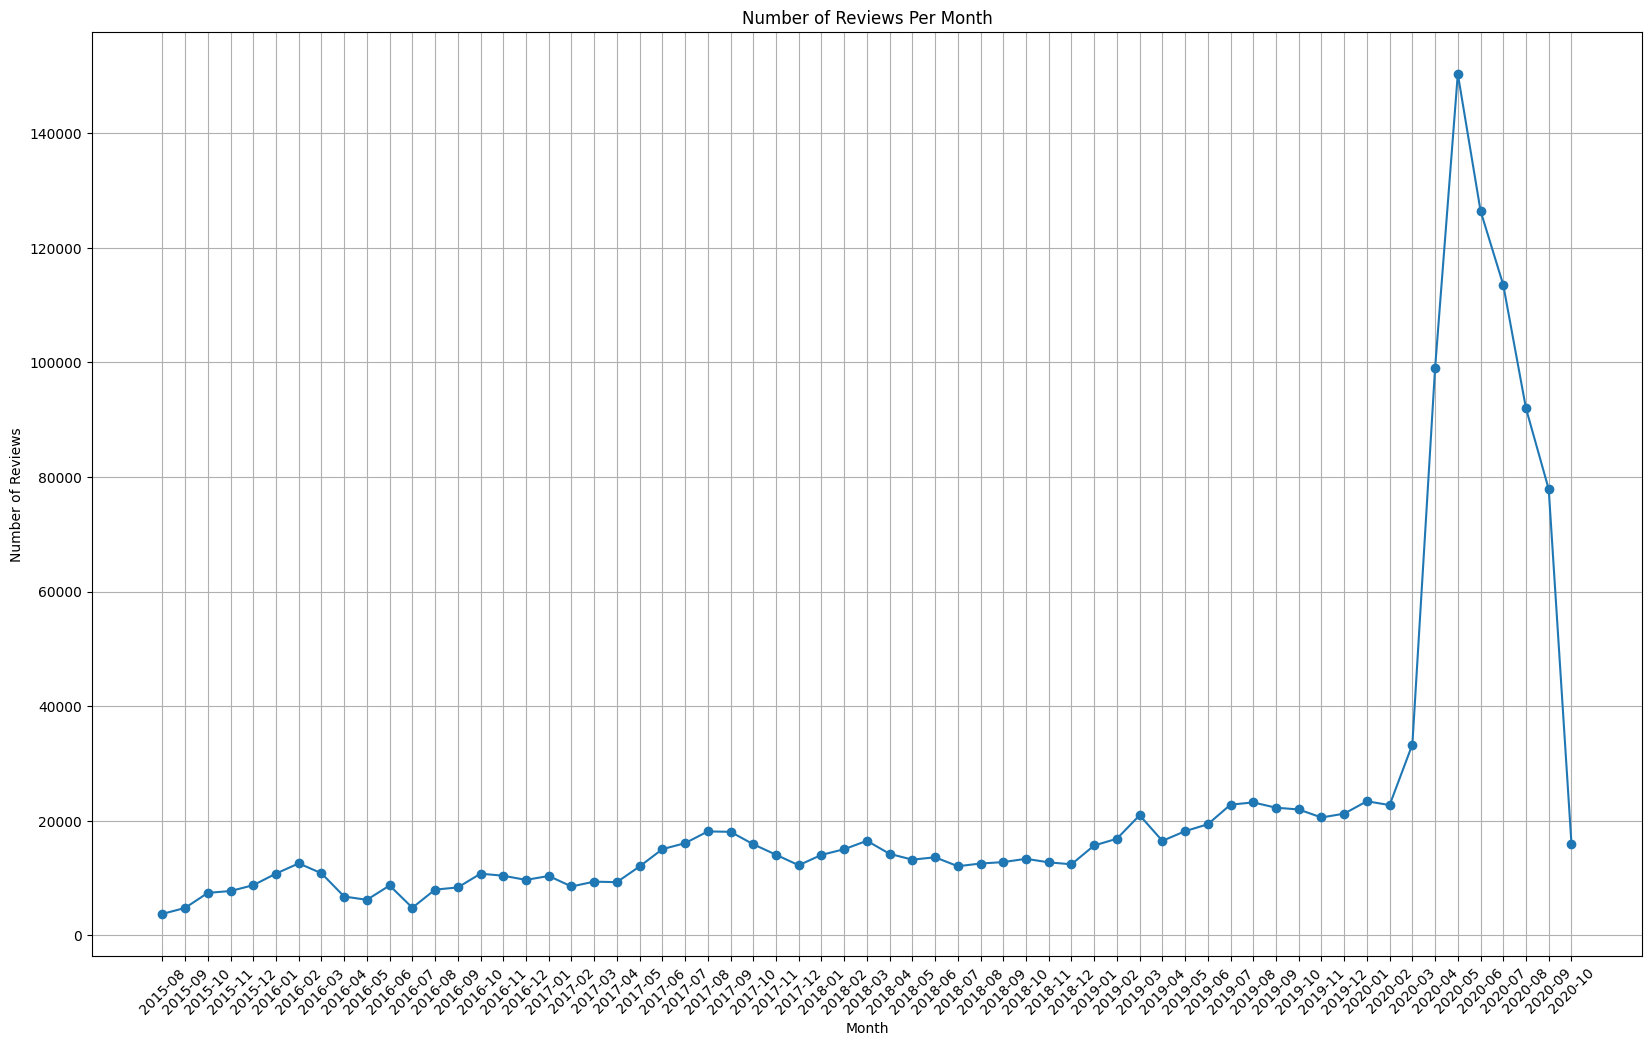

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_reviews' to datetime format
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'], format='%b %d, %Y')

# Group by month and count the reviews per month
df_reviews['month'] = df_reviews['date_reviews'].dt.to_period('M')
df_aggregated = df_reviews.groupby('month').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(df_aggregated['month'].astype(str), df_aggregated['review_count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


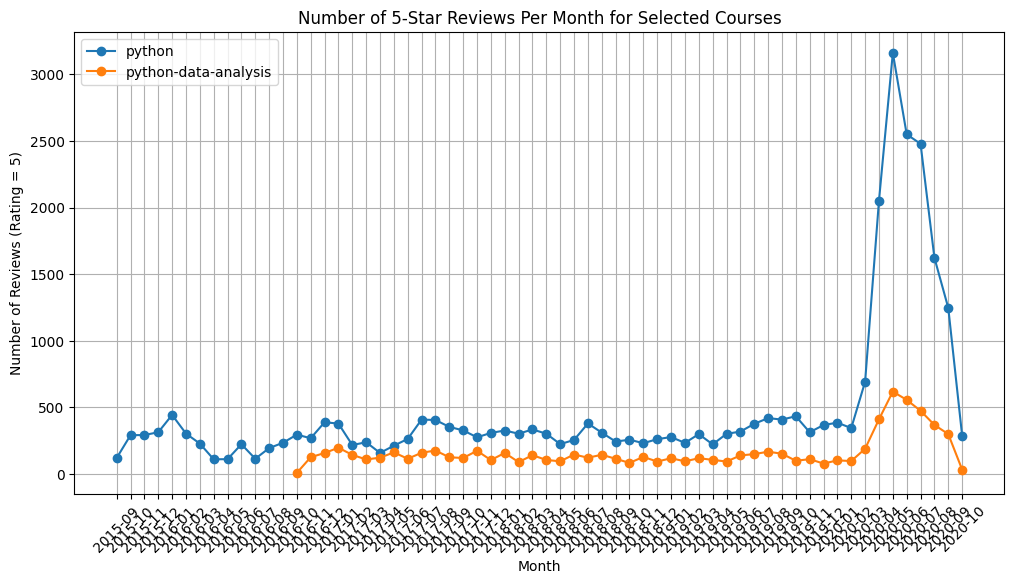

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_reviews' to datetime format
df_reviews['date_reviews'] = pd.to_datetime(df_reviews['date_reviews'], format='%b %d, %Y')

# Filter for specific course IDs and a rating of 5
filtered_df = df_reviews[
    (df_reviews['course_id'].isin(['python-data-analysis', 'python'])) & 
    (df_reviews['rating'] == 5)
]

# Extract month from the date using .loc to avoid SettingWithCopyWarning
filtered_df.loc[:, 'month'] = filtered_df['date_reviews'].dt.to_period('M')

# Group by month and course_id, counting the reviews
df_aggregated = (filtered_df
                 .groupby(['month', 'course_id'])
                 .size()
                 .reset_index(name='review_count'))

# Plotting
plt.figure(figsize=(12, 6))

# Create a line plot for each course_id
for course_id in df_aggregated['course_id'].unique():
    plt.plot(df_aggregated[df_aggregated['course_id'] == course_id]['month'].astype(str), 
             df_aggregated[df_aggregated['course_id'] == course_id]['review_count'], 
             marker='o', 
             linestyle='-', 
             label=course_id)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Reviews (Rating = 5)')
plt.title('Number of 5-Star Reviews Per Month for Selected Courses')
plt.xticks(rotation=45)
plt.legend()  # Show legend for course IDs
plt.grid(True)

# Show the plot
plt.show()


Defining the course ids related to Computer Science based on the list of all unique courses, just kept the ones I thought to be clearly associated with Computer Science.

In [14]:
# List of course IDs related to Computer Science
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Assign 'Computer Science' to courses in the list
df_reviews['departments'] = df_reviews['course_id'].apply(lambda x: 'Computer Science' if x in cs_courses else None)
df_reviews


reviews        reviewers  \
0        Pretty dry, but I was able to pass with just t...      By Robert S   
1        would be a better experience if the video and ...   By Gabriel E R   
2        Information was perfect! The program itself wa...       By Jacob D   
3        A few grammatical mistakes on test made me do ...        By Dale B   
4        Excellent course and the training provided was...        By Sean G   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

        date_reviews  rating                 course_id    month  \
0         2020-02-12       4  google-cbrs-cpi-training  2020-02   
1         2020-09-28       4  google-cbrs-cpi-training  2020-09   
2         2020-04-08       4  google-cbrs-cpi-training  2020-04   
3         2020-02-24       4  google-cbrs-cpi-training  2020-02   
4         2020-06-18       4  google-cbrs-cpi-training  2020-06   
...              ...     ...                       ...      ...   
1454706   2020-08-25       5       computer-networking  2020-08   
1454707   2020-07-02       5       computer-networking  2020-07   
1454708   2020-06-20       5       computer-networking  2020-06   
1454709   2020-06-07       5       computer-networking  2020-06   
1454710   2018-08-12       5       computer-networking  2018-08   

              departments  
0                    None  
1                    None  
2                    None  
3                    None  
4                    None  
...                   ...  
1454706  Computer Science  
1454707  Computer Science  
1454708  Computer Science  
1454709  Computer Science  
1454710  Computer Science  

[1454711 rows x 7 columns]

In [15]:
df_cs_reviews = df_reviews[df_reviews['departments'] == 'Computer Science']['reviews']

In [16]:
df_reviews_copy = df_reviews.copy()
df_reviews_copy

reviews        reviewers  \
0        Pretty dry, but I was able to pass with just t...      By Robert S   
1        would be a better experience if the video and ...   By Gabriel E R   
2        Information was perfect! The program itself wa...       By Jacob D   
3        A few grammatical mistakes on test made me do ...        By Dale B   
4        Excellent course and the training provided was...        By Sean G   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

        date_reviews  rating                 course_id    month  \
0         2020-02-12       4  google-cbrs-cpi-training  2020-02   
1         2020-09-28       4  google-cbrs-cpi-training  2020-09   
2         2020-04-08       4  google-cbrs-cpi-training  2020-04   
3         2020-02-24       4  google-cbrs-cpi-training  2020-02   
4         2020-06-18       4  google-cbrs-cpi-training  2020-06   
...              ...     ...                       ...      ...   
1454706   2020-08-25       5       computer-networking  2020-08   
1454707   2020-07-02       5       computer-networking  2020-07   
1454708   2020-06-20       5       computer-networking  2020-06   
1454709   2020-06-07       5       computer-networking  2020-06   
1454710   2018-08-12       5       computer-networking  2018-08   

              departments  
0                    None  
1                    None  
2                    None  
3                    None  
4                    None  
...                   ...  
1454706  Computer Science  
1454707  Computer Science  
1454708  Computer Science  
1454709  Computer Science  
1454710  Computer Science  

[1454711 rows x 7 columns]

Removing All Modules Unrelated to Computer Science

In [17]:
df_cs_reviews_only = df_reviews_copy[df_reviews_copy['departments'] == 'Computer Science']
df_cs_reviews_only

reviews        reviewers  \
15727    I did not find this course helpful. The assign...      By Eric V H   
15728    I got a 95% and maybe I learned something but ...      By Connor B   
15729    Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
15730    We tried to use this class to teach a brown ba...       By Steve M   
15731    To be honest, I thought the course stumbled an...     By Terence P   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

        date_reviews  rating            course_id    month       departments  
15727     2017-10-05       1               python  2017-10  Computer Science  
15728     2017-08-06       1               python  2017-08  Computer Science  
15729     2019-03-28       1               python  2019-03  Computer Science  
15730     2015-10-20       1               python  2015-10  Computer Science  
15731     2016-05-11       1               python  2016-05  Computer Science  
...              ...     ...                  ...      ...               ...  
1454706   2020-08-25       5  computer-networking  2020-08  Computer Science  
1454707   2020-07-02       5  computer-networking  2020-07  Computer Science  
1454708   2020-06-20       5  computer-networking  2020-06  Computer Science  
1454709   2020-06-07       5  computer-networking  2020-06  Computer Science  
1454710   2018-08-12       5  computer-networking  2018-08  Computer Science  

[433503 rows x 7 columns]

In [18]:
# checking for duplicates
df_cs_reviews_only.drop_duplicates(keep='first')# Drop all occurrences of duplicates
df_cs_reviews_only

reviews        reviewers  \
15727    I did not find this course helpful. The assign...      By Eric V H   
15728    I got a 95% and maybe I learned something but ...      By Connor B   
15729    Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
15730    We tried to use this class to teach a brown ba...       By Steve M   
15731    To be honest, I thought the course stumbled an...     By Terence P   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

        date_reviews  rating            course_id    month       departments  
15727     2017-10-05       1               python  2017-10  Computer Science  
15728     2017-08-06       1               python  2017-08  Computer Science  
15729     2019-03-28       1               python  2019-03  Computer Science  
15730     2015-10-20       1               python  2015-10  Computer Science  
15731     2016-05-11       1               python  2016-05  Computer Science  
...              ...     ...                  ...      ...               ...  
1454706   2020-08-25       5  computer-networking  2020-08  Computer Science  
1454707   2020-07-02       5  computer-networking  2020-07  Computer Science  
1454708   2020-06-20       5  computer-networking  2020-06  Computer Science  
1454709   2020-06-07       5  computer-networking  2020-06  Computer Science  
1454710   2018-08-12       5  computer-networking  2018-08  Computer Science  

[433503 rows x 7 columns]

Checking the Number of Reviews for each computer science module

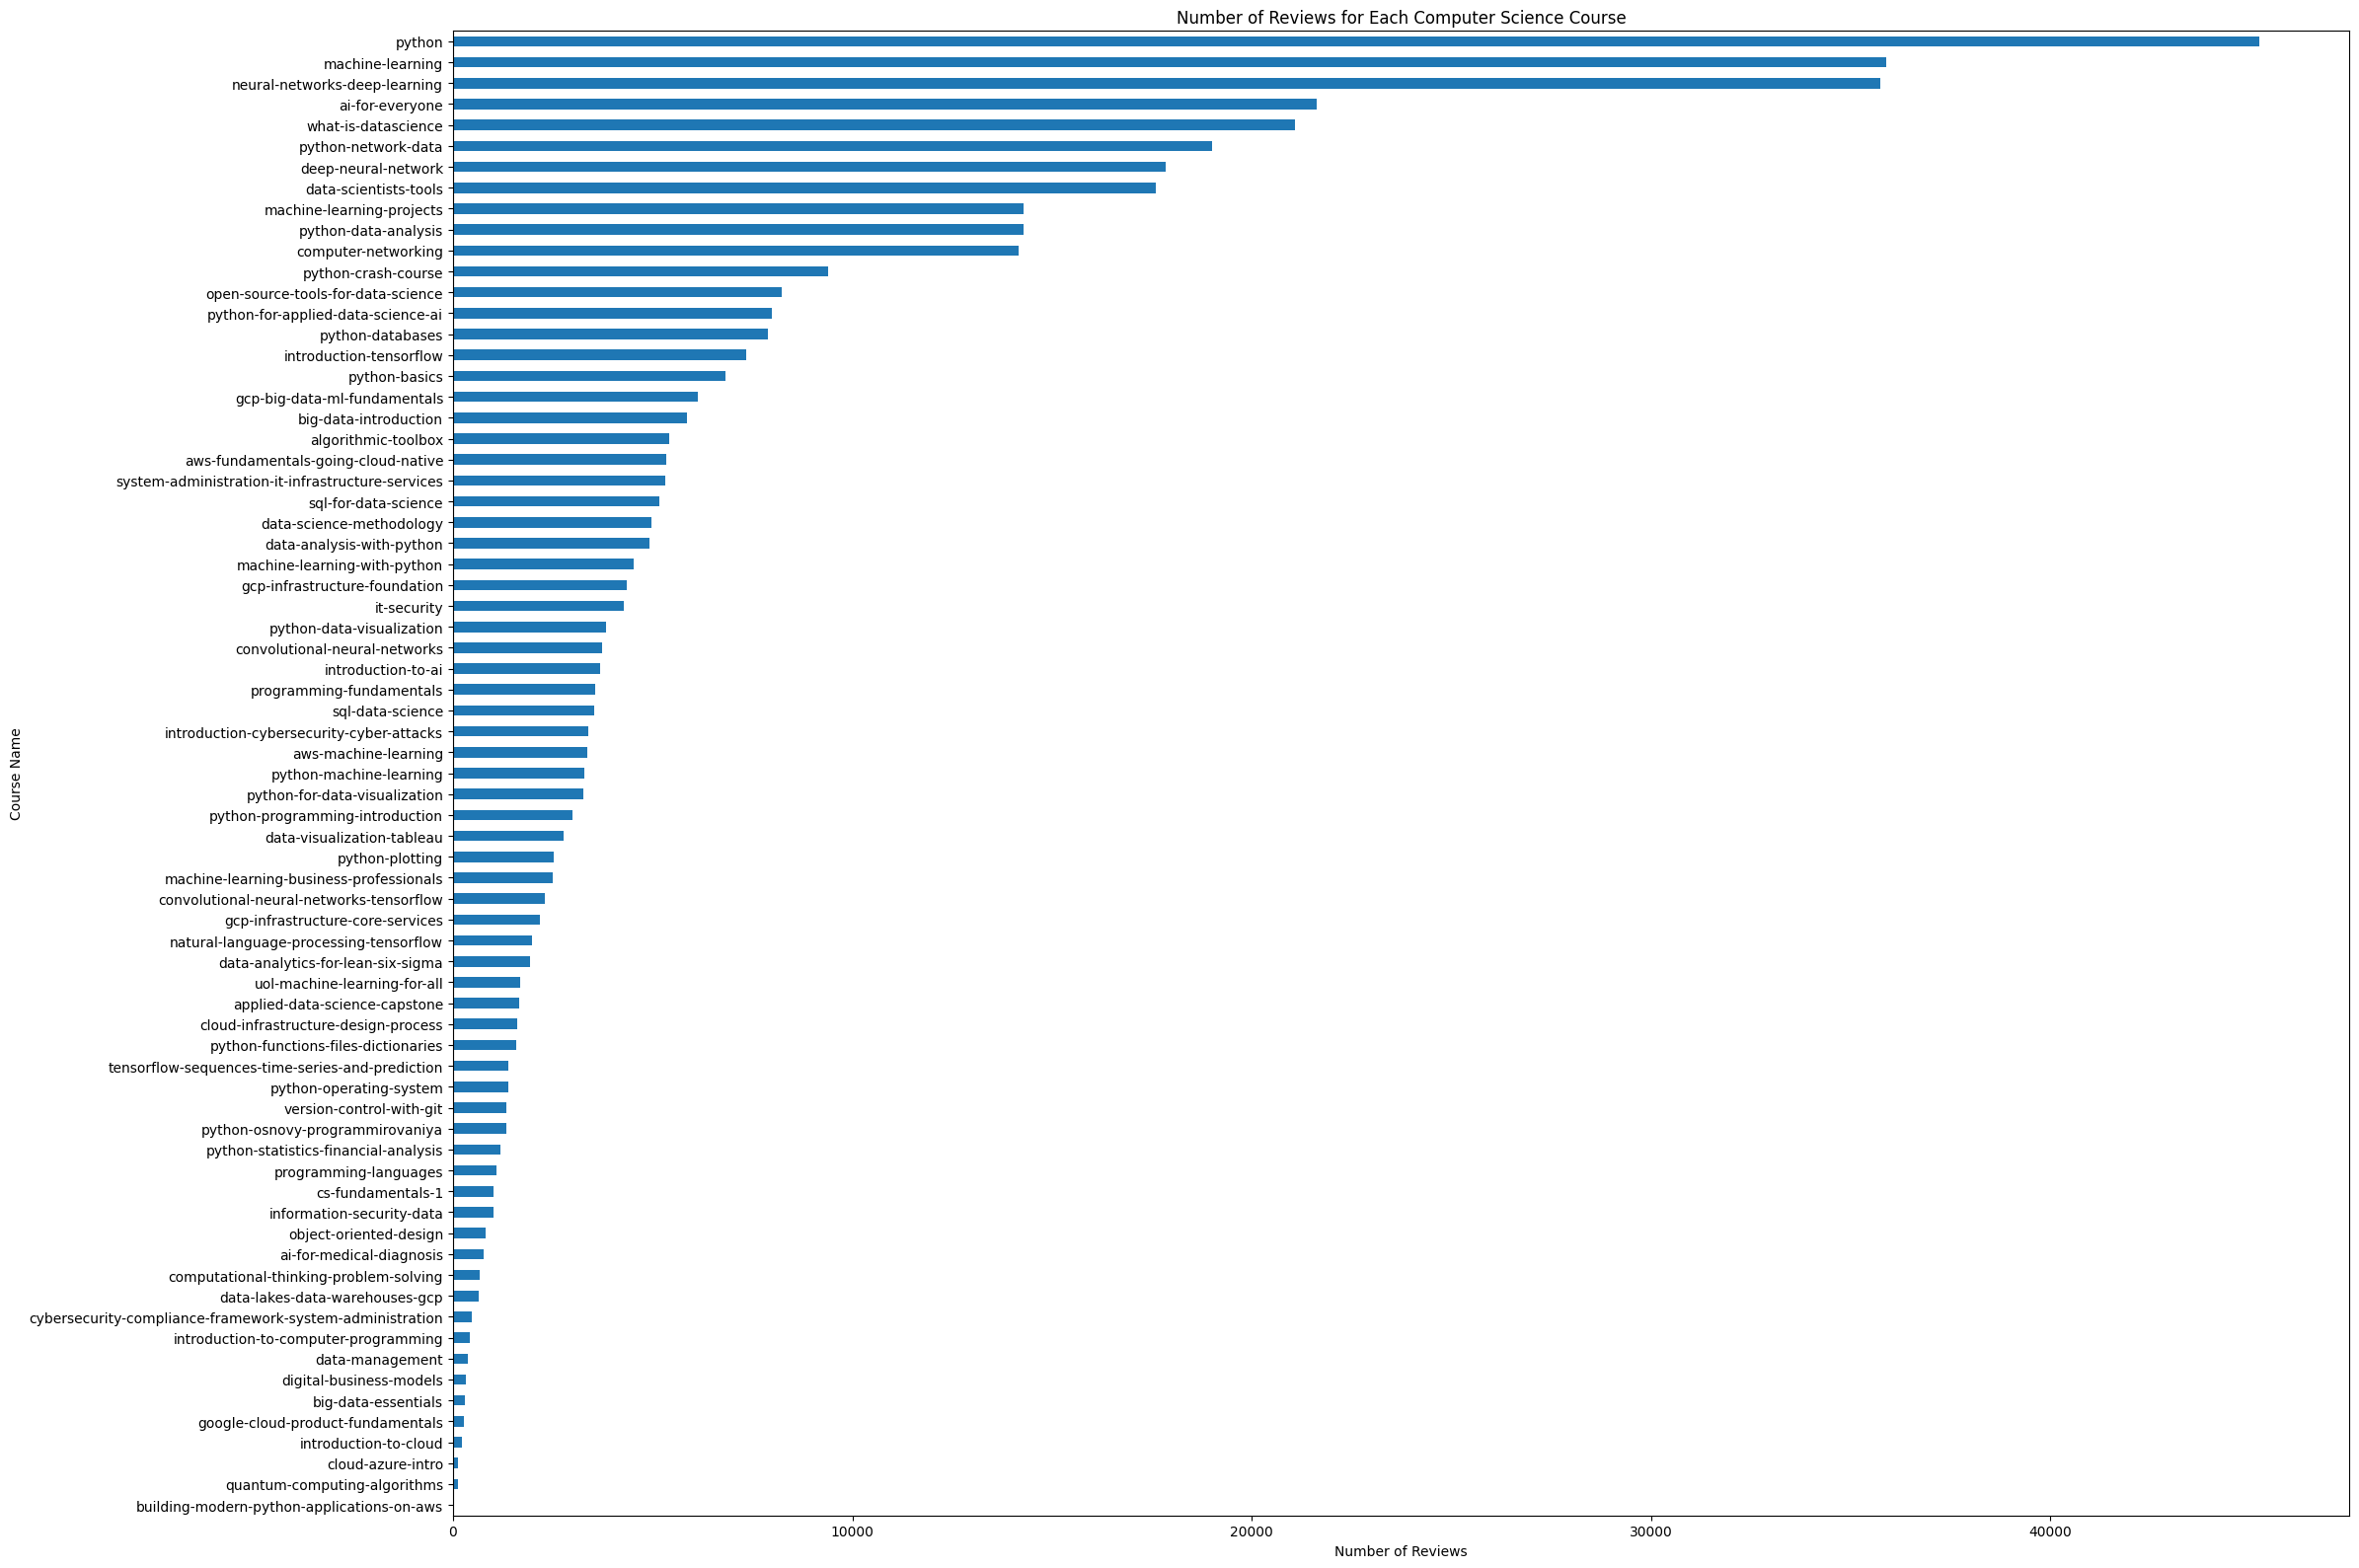

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()


Removing Modules with reviews that are empty

In [20]:
df_cs_reviews_only = df_cs_reviews_only.dropna(subset=['reviews']) # remove empty reviews
df_cs_reviews_only

reviews        reviewers  \
15727    I did not find this course helpful. The assign...      By Eric V H   
15728    I got a 95% and maybe I learned something but ...      By Connor B   
15729    Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
15730    We tried to use this class to teach a brown ba...       By Steve M   
15731    To be honest, I thought the course stumbled an...     By Terence P   
...                                                    ...              ...   
1454706                                                  g     By Brijesh K   
1454707                                                  .    By Vasavi V M   
1454708                                                  .     By Drishti D   
1454709                                                  .  By FAUSTINE F K   
1454710                                                  G        By Reza S   

        date_reviews  rating            course_id    month       departments  
15727     2017-10-05       1               python  2017-10  Computer Science  
15728     2017-08-06       1               python  2017-08  Computer Science  
15729     2019-03-28       1               python  2019-03  Computer Science  
15730     2015-10-20       1               python  2015-10  Computer Science  
15731     2016-05-11       1               python  2016-05  Computer Science  
...              ...     ...                  ...      ...               ...  
1454706   2020-08-25       5  computer-networking  2020-08  Computer Science  
1454707   2020-07-02       5  computer-networking  2020-07  Computer Science  
1454708   2020-06-20       5  computer-networking  2020-06  Computer Science  
1454709   2020-06-07       5  computer-networking  2020-06  Computer Science  
1454710   2018-08-12       5  computer-networking  2018-08  Computer Science  

[433443 rows x 7 columns]

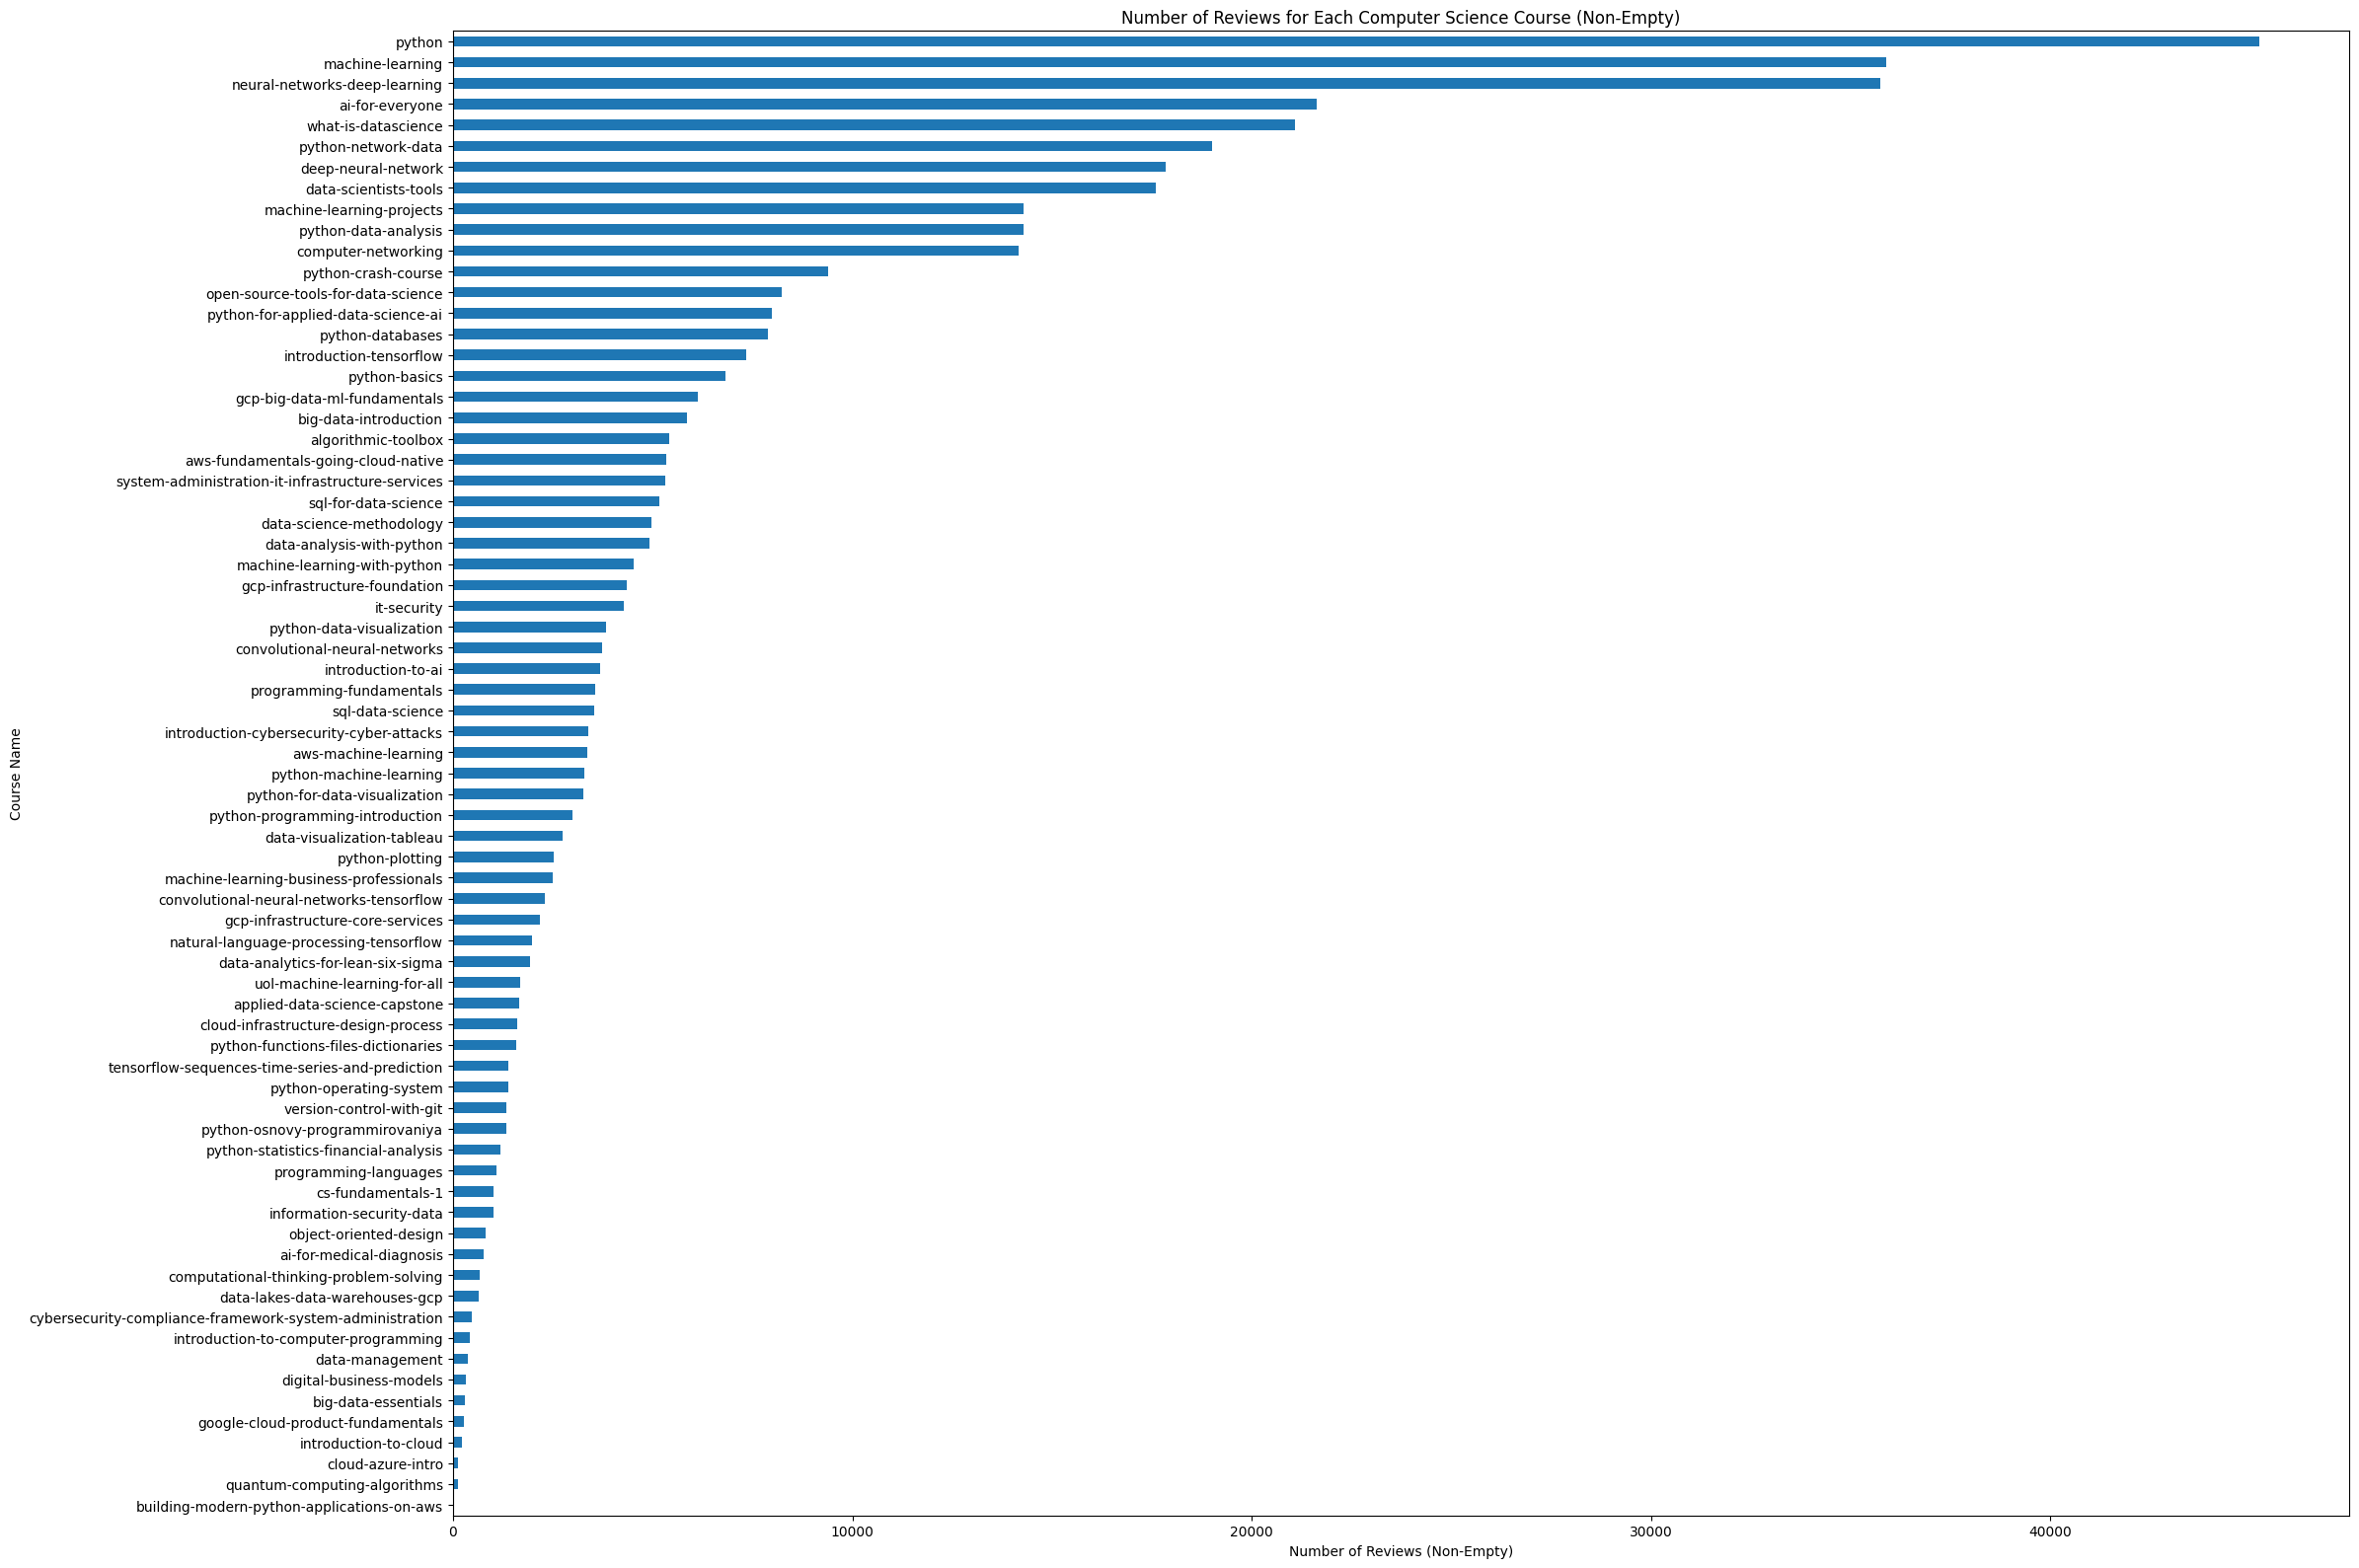

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews (Non-Empty)')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course (Non-Empty)')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()

In [22]:
# Count the number of entries for the specific course
course_name = 'building-modern-python-applications-on-aws'
entry_count = df_cs_reviews_only[df_cs_reviews_only['course_id'] == course_name].shape[0]

print(f'Number of entries for "{course_name}": {entry_count}')


Number of entries for "building-modern-python-applications-on-aws": 3


Removing Modules with less than 30 reviews. Because:

For opinion mining, generally:
* Minimum: At least 20-30 reviews for meaningful insights.
* Optimal: Ideally 50-100+ reviews to gain a better understanding of sentiment and prevalent opinions.
* From Literature review, can't gain useful insights for a module with < 25 reviews, so choose >30. 50+ is too high, since it is unrealistic to expect such a high response rate

In [ ]:
# Count the number of reviews per course
course_review_counts = df_cs_reviews_only['course_id'].value_counts()
# Boolean mask for courses with at least 30 and 100 reviews
mask_at_least_30 = course_review_counts[course_review_counts >= 30].index
mask_at_least_100 = course_review_counts[course_review_counts >= 100].index

# Filter the original DataFrame based masks
df_cs_reviews_only_at_least_30 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_30)].reset_index(drop=True)
df_cs_reviews_only_at_least_100 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_100)].reset_index(drop=True)


In [25]:
# course entries with at least 30 entries
df_cs_reviews_only_at_least_30 

reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
433435                                                  g     By Brijesh K   
433436                                                  .    By Vasavi V M   
433437                                                  .     By Drishti D   
433438                                                  .  By FAUSTINE F K   
433439                                                  G        By Reza S   

       date_reviews  rating            course_id    month       departments  
0        2017-10-05       1               python  2017-10  Computer Science  
1        2017-08-06       1               python  2017-08  Computer Science  
2        2019-03-28       1               python  2019-03  Computer Science  
3        2015-10-20       1               python  2015-10  Computer Science  
4        2016-05-11       1               python  2016-05  Computer Science  
...             ...     ...                  ...      ...               ...  
433435   2020-08-25       5  computer-networking  2020-08  Computer Science  
433436   2020-07-02       5  computer-networking  2020-07  Computer Science  
433437   2020-06-20       5  computer-networking  2020-06  Computer Science  
433438   2020-06-07       5  computer-networking  2020-06  Computer Science  
433439   2018-08-12       5  computer-networking  2018-08  Computer Science  

[433440 rows x 7 columns]

In [26]:
# course entries with at least 100 entries, if results are not good, then I'd do at least 500 (but unrealistic for a real module in real life)
df_cs_reviews_only_at_least_100 

reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
433435                                                  g     By Brijesh K   
433436                                                  .    By Vasavi V M   
433437                                                  .     By Drishti D   
433438                                                  .  By FAUSTINE F K   
433439                                                  G        By Reza S   

       date_reviews  rating            course_id    month       departments  
0        2017-10-05       1               python  2017-10  Computer Science  
1        2017-08-06       1               python  2017-08  Computer Science  
2        2019-03-28       1               python  2019-03  Computer Science  
3        2015-10-20       1               python  2015-10  Computer Science  
4        2016-05-11       1               python  2016-05  Computer Science  
...             ...     ...                  ...      ...               ...  
433435   2020-08-25       5  computer-networking  2020-08  Computer Science  
433436   2020-07-02       5  computer-networking  2020-07  Computer Science  
433437   2020-06-20       5  computer-networking  2020-06  Computer Science  
433438   2020-06-07       5  computer-networking  2020-06  Computer Science  
433439   2018-08-12       5  computer-networking  2018-08  Computer Science  

[433440 rows x 7 columns]

In [27]:
# Count the number of reviews per course
course_review_counts = df_cs_reviews_only['course_id'].value_counts()
# Create a boolean mask for courses with at least 30 and 500 reviews
mask_at_least_500 = course_review_counts[course_review_counts >= 500].index # but 500 is not a realistic number of reviews for a single module at a univeristy where the module is taken in-person

# Filter the original DataFrame based on these masks
df_cs_reviews_only_at_least_500 = df_cs_reviews_only[df_cs_reviews_only['course_id'].isin(mask_at_least_500)].reset_index(drop=True)
df_cs_reviews_only_at_least_500

reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
430809                                                  g     By Brijesh K   
430810                                                  .    By Vasavi V M   
430811                                                  .     By Drishti D   
430812                                                  .  By FAUSTINE F K   
430813                                                  G        By Reza S   

       date_reviews  rating            course_id    month       departments  
0        2017-10-05       1               python  2017-10  Computer Science  
1        2017-08-06       1               python  2017-08  Computer Science  
2        2019-03-28       1               python  2019-03  Computer Science  
3        2015-10-20       1               python  2015-10  Computer Science  
4        2016-05-11       1               python  2016-05  Computer Science  
...             ...     ...                  ...      ...               ...  
430809   2020-08-25       5  computer-networking  2020-08  Computer Science  
430810   2020-07-02       5  computer-networking  2020-07  Computer Science  
430811   2020-06-20       5  computer-networking  2020-06  Computer Science  
430812   2020-06-07       5  computer-networking  2020-06  Computer Science  
430813   2018-08-12       5  computer-networking  2018-08  Computer Science  

[430814 rows x 7 columns]

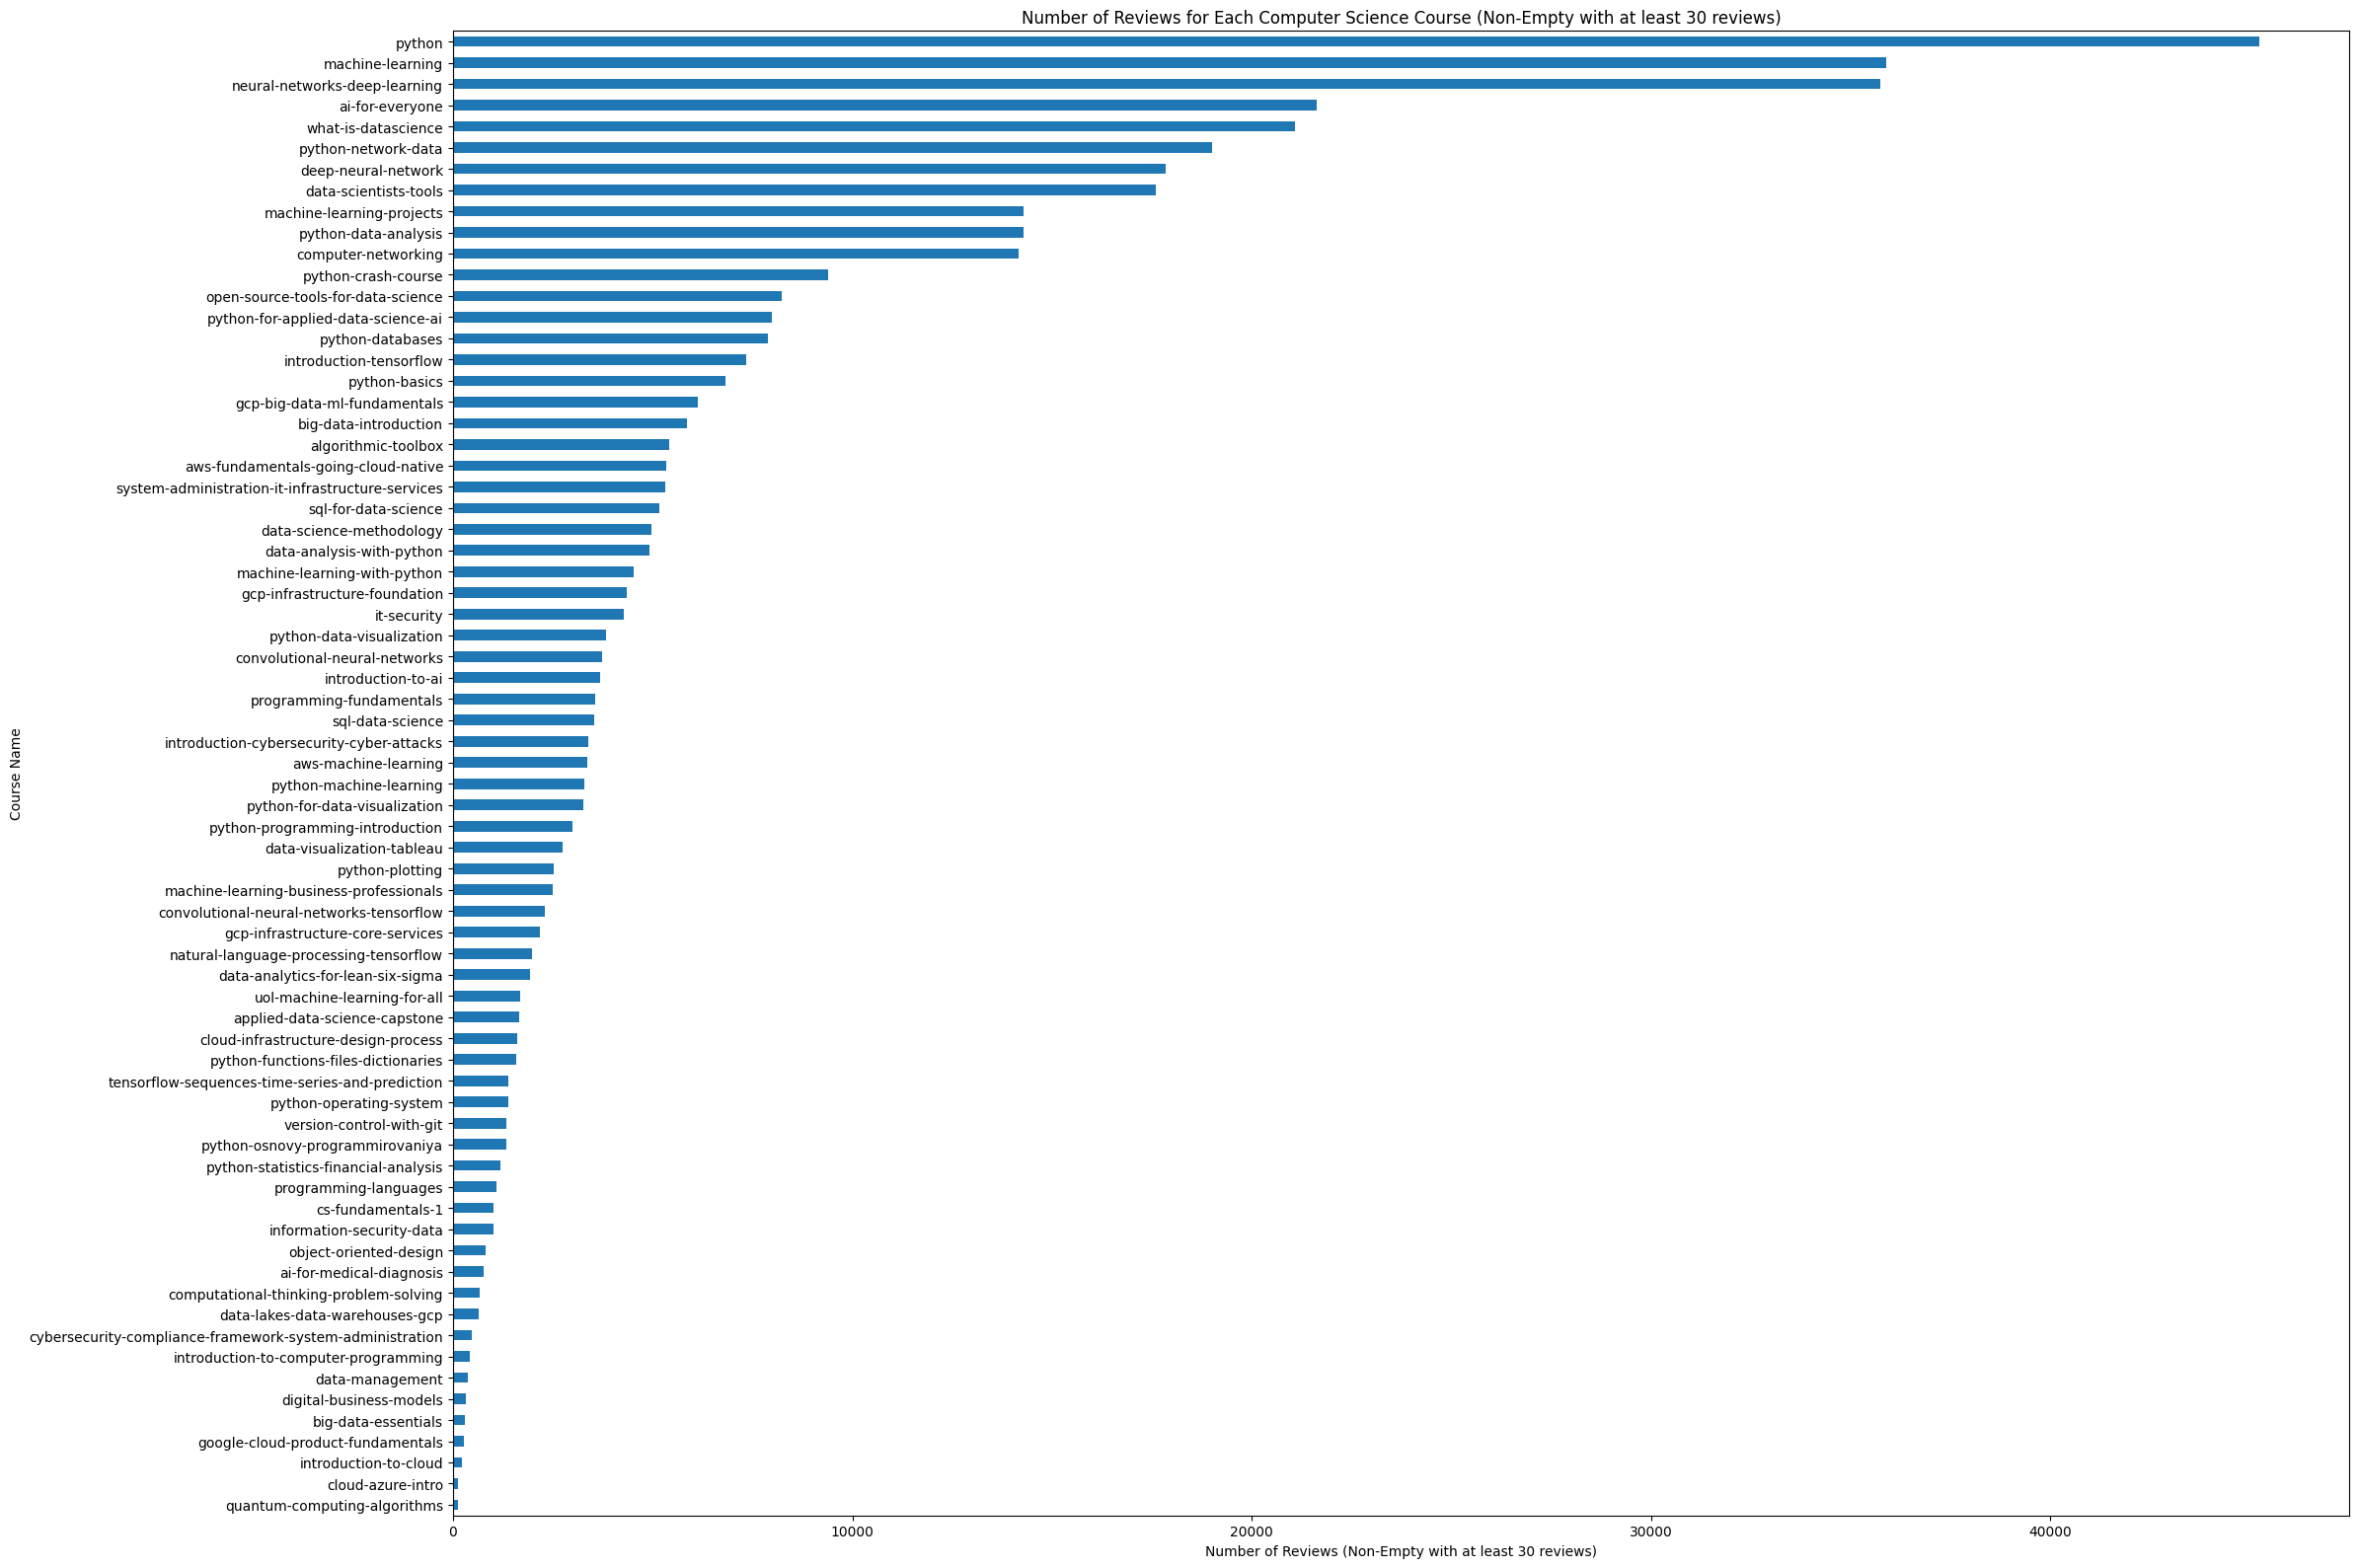

In [28]:
df_cs_reviews_only_at_least_30 
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cs_reviews_only_at_least_30[df_cs_reviews_only_at_least_30['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews (Non-Empty with at least 30 reviews)')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course (Non-Empty with at least 30 reviews)')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()

In [29]:
# data points are sufficient for model training for sentiment analysis and opinion mining/topic modelling
len(cs_courses)

73

Merging the 2 dataframes together

In [30]:
import pandas as pd

# Merge the two DataFrames based on course_id
df_combined = df_cs_reviews_only_at_least_30.merge(
    df_courses[['name', 'course_id', 'institution']],  # Selecting relevant columns from df_courses
    on='course_id',  # Merging on the course_id column
    how='left'  # Left join to keep all entries from df_cs_reviews_only_at_least_30
)

# Display the resulting DataFrame
df_combined


reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
433435                                                  g     By Brijesh K   
433436                                                  .    By Vasavi V M   
433437                                                  .     By Drishti D   
433438                                                  .  By FAUSTINE F K   
433439                                                  G        By Reza S   

       date_reviews  rating            course_id    month       departments  \
0        2017-10-05       1               python  2017-10  Computer Science   
1        2017-08-06       1               python  2017-08  Computer Science   
2        2019-03-28       1               python  2019-03  Computer Science   
3        2015-10-20       1               python  2015-10  Computer Science   
4        2016-05-11       1               python  2016-05  Computer Science   
...             ...     ...                  ...      ...               ...   
433435   2020-08-25       5  computer-networking  2020-08  Computer Science   
433436   2020-07-02       5  computer-networking  2020-07  Computer Science   
433437   2020-06-20       5  computer-networking  2020-06  Computer Science   
433438   2020-06-07       5  computer-networking  2020-06  Computer Science   
433439   2018-08-12       5  computer-networking  2018-08  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433435          The Bits and Bytes of Computer Networking   
433436          The Bits and Bytes of Computer Networking   
433437          The Bits and Bytes of Computer Networking   
433438          The Bits and Bytes of Computer Networking   
433439          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433435                  Google  
433436                  Google  
433437                  Google  
433438                  Google  
433439                  Google  

[433440 rows x 9 columns]

In [31]:
df_combined

reviews        reviewers  \
0       I did not find this course helpful. The assign...      By Eric V H   
1       I got a 95% and maybe I learned something but ...      By Connor B   
2       Two weeks of all sort of nonsense, including m...  By Cyntia R T G   
3       We tried to use this class to teach a brown ba...       By Steve M   
4       To be honest, I thought the course stumbled an...     By Terence P   
...                                                   ...              ...   
433435                                                  g     By Brijesh K   
433436                                                  .    By Vasavi V M   
433437                                                  .     By Drishti D   
433438                                                  .  By FAUSTINE F K   
433439                                                  G        By Reza S   

       date_reviews  rating            course_id    month       departments  \
0        2017-10-05       1               python  2017-10  Computer Science   
1        2017-08-06       1               python  2017-08  Computer Science   
2        2019-03-28       1               python  2019-03  Computer Science   
3        2015-10-20       1               python  2015-10  Computer Science   
4        2016-05-11       1               python  2016-05  Computer Science   
...             ...     ...                  ...      ...               ...   
433435   2020-08-25       5  computer-networking  2020-08  Computer Science   
433436   2020-07-02       5  computer-networking  2020-07  Computer Science   
433437   2020-06-20       5  computer-networking  2020-06  Computer Science   
433438   2020-06-07       5  computer-networking  2020-06  Computer Science   
433439   2018-08-12       5  computer-networking  2018-08  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433435          The Bits and Bytes of Computer Networking   
433436          The Bits and Bytes of Computer Networking   
433437          The Bits and Bytes of Computer Networking   
433438          The Bits and Bytes of Computer Networking   
433439          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433435                  Google  
433436                  Google  
433437                  Google  
433438                  Google  
433439                  Google  

[433440 rows x 9 columns]

Removing irrelevant columns after dataframes merge

In [32]:
# Dropping the 'reviewers' column from df_combined
df_combined = df_combined.drop(columns=['reviewers'], errors='ignore')

# Display the updated DataFrame
df_combined

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433435                                                  g   2020-08-25   
433436                                                  .   2020-07-02   
433437                                                  .   2020-06-20   
433438                                                  .   2020-06-07   
433439                                                  G   2018-08-12   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433435       5  computer-networking  2020-08  Computer Science   
433436       5  computer-networking  2020-07  Computer Science   
433437       5  computer-networking  2020-06  Computer Science   
433438       5  computer-networking  2020-06  Computer Science   
433439       5  computer-networking  2018-08  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433435          The Bits and Bytes of Computer Networking   
433436          The Bits and Bytes of Computer Networking   
433437          The Bits and Bytes of Computer Networking   
433438          The Bits and Bytes of Computer Networking   
433439          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433435                  Google  
433436                  Google  
433437                  Google  
433438                  Google  
433439                  Google  

[433440 rows x 8 columns]

In [33]:
df_combined = df_combined.dropna(subset=['reviews'])
df_combined

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433435                                                  g   2020-08-25   
433436                                                  .   2020-07-02   
433437                                                  .   2020-06-20   
433438                                                  .   2020-06-07   
433439                                                  G   2018-08-12   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433435       5  computer-networking  2020-08  Computer Science   
433436       5  computer-networking  2020-07  Computer Science   
433437       5  computer-networking  2020-06  Computer Science   
433438       5  computer-networking  2020-06  Computer Science   
433439       5  computer-networking  2018-08  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433435          The Bits and Bytes of Computer Networking   
433436          The Bits and Bytes of Computer Networking   
433437          The Bits and Bytes of Computer Networking   
433438          The Bits and Bytes of Computer Networking   
433439          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433435                  Google  
433436                  Google  
433437                  Google  
433438                  Google  
433439                  Google  

[433440 rows x 8 columns]

Getting the unique institutions that provide the courses

In [34]:
df_combined['institution'].unique()
institutions = ['University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
       'University of Pennsylvania', 'University of California, Davis',
       'Johns Hopkins University',
       'University of Illinois at Urbana-Champaign', 'Google Cloud',
       'Amazon Web Services', 'University of London',
       'University of California San Diego',
       'The Hong Kong University of Science and Technology',
       'Duke University', 'University of Amsterdam', 'Atlassian',
       'National Research University Higher School of Economics',
       'Wesleyan University', 'LearnQuest', 'University of Alberta',
       'Royal Holloway, University of London', 'University of Washington',
       'Saint Petersburg State University', 'Lund University', 'Yandex',
       'The University of Edinburgh', 'Stanford University']

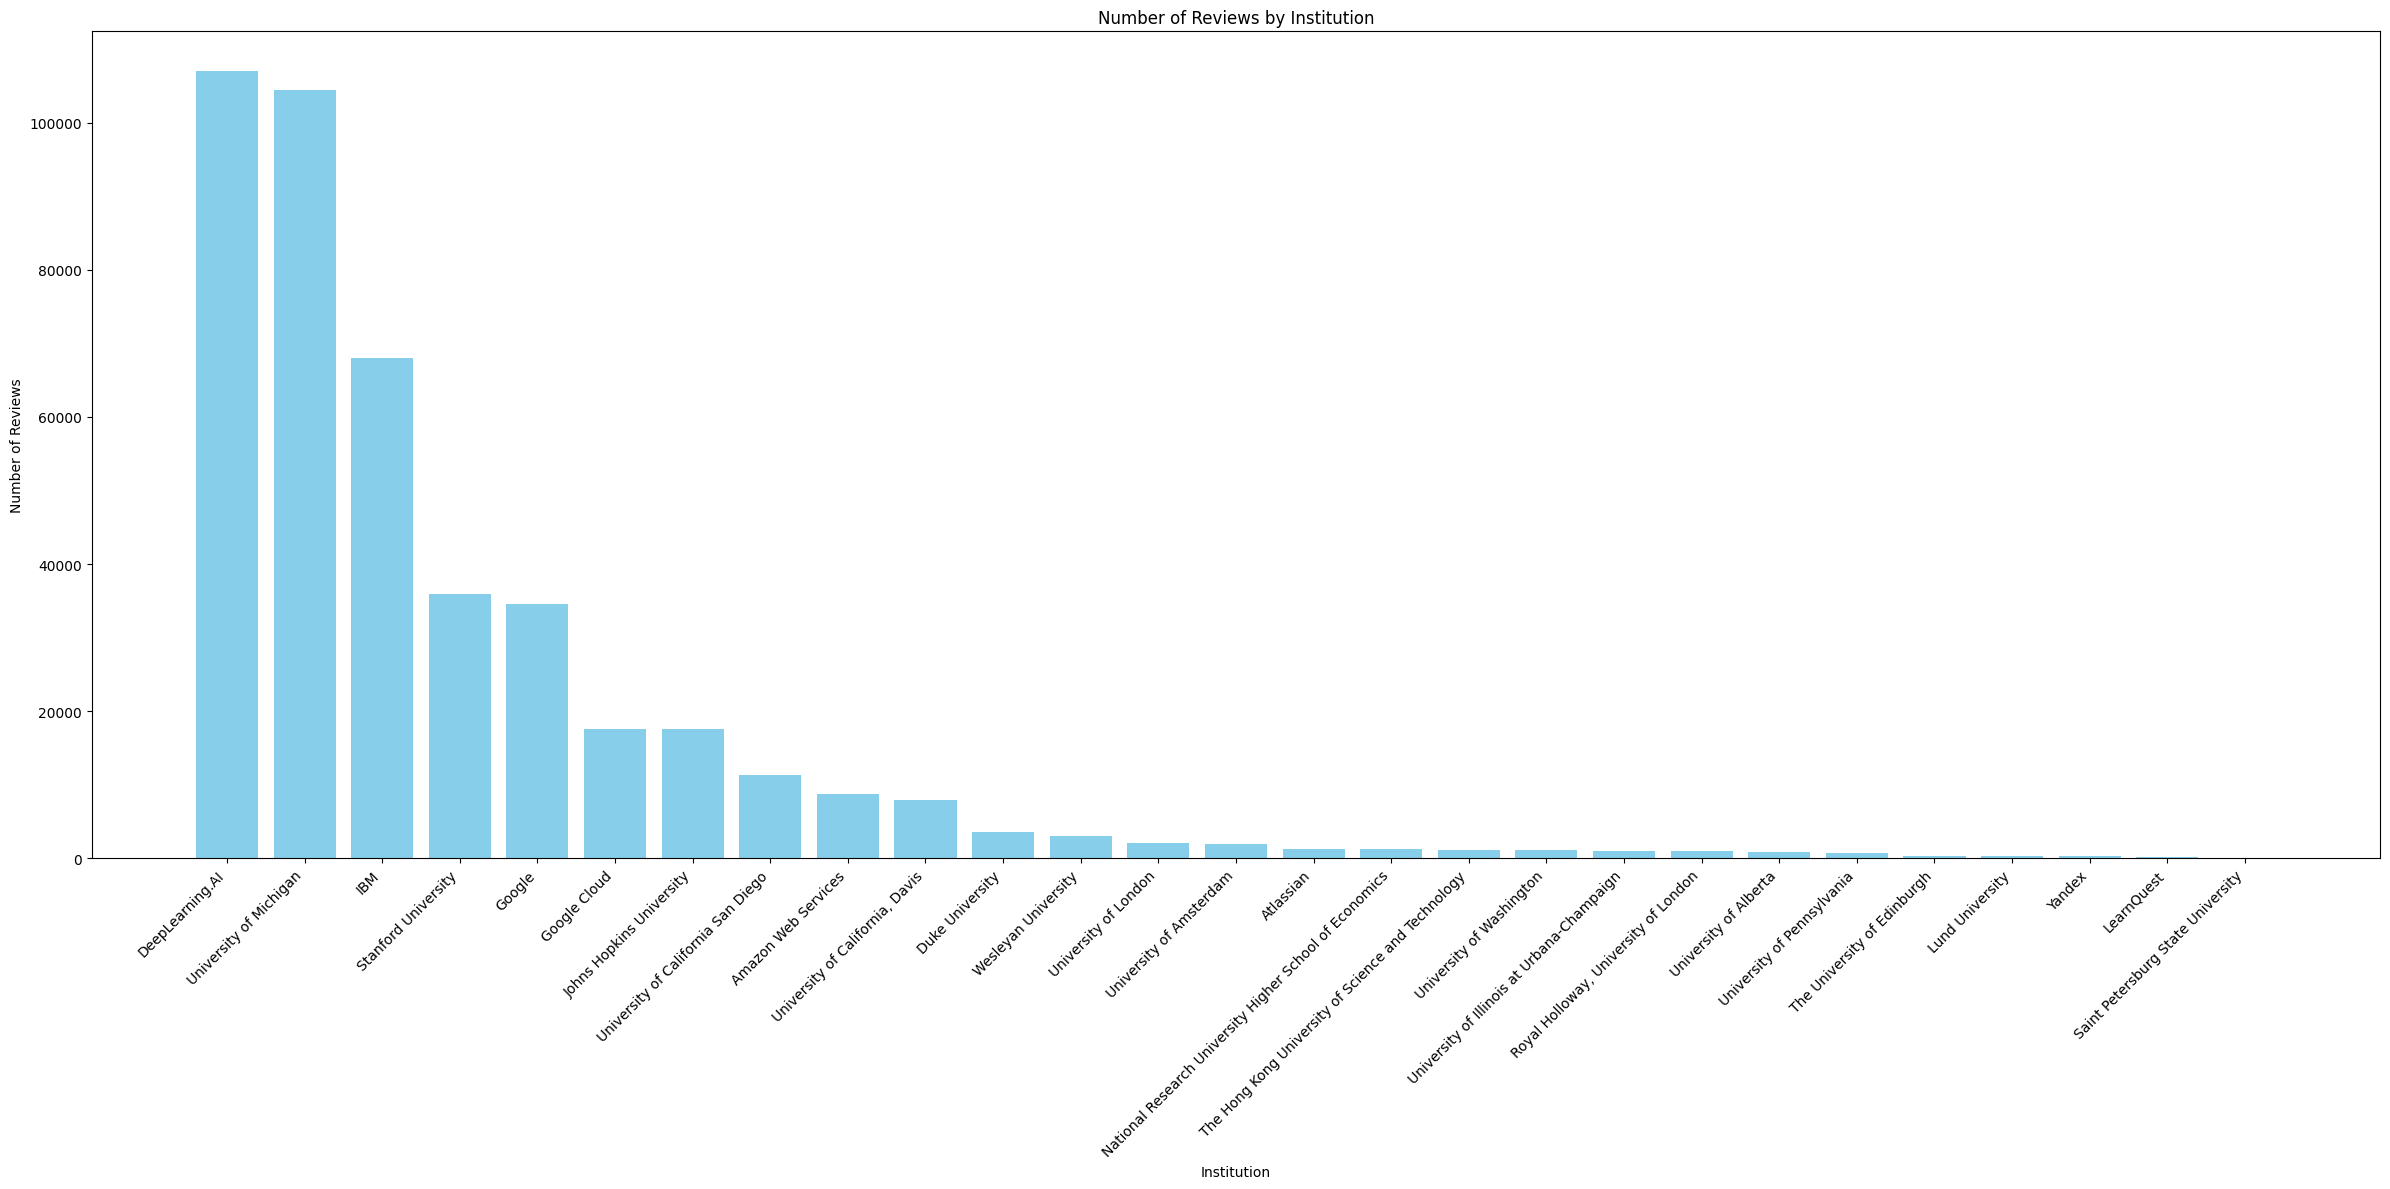

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# List of institutions to filter
institutions = [
    'University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
    'University of Pennsylvania', 'University of California, Davis',
    'Johns Hopkins University', 'University of Illinois at Urbana-Champaign',
    'Google Cloud', 'Amazon Web Services', 'University of London',
    'University of California San Diego',
    'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 'Atlassian',
    'National Research University Higher School of Economics',
    'Wesleyan University', 'LearnQuest', 'University of Alberta',
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 'Yandex',
    'The University of Edinburgh', 'Stanford University'
]

# Count occurrences of each institution
institution_counts = df_combined['institution'].value_counts()

# Filter counts for specified institutions
filtered_counts = institution_counts[institution_counts.index.isin(institutions)]

# Reset index to turn the Series into a DataFrame
filtered_counts = filtered_counts.reset_index()
filtered_counts.columns = ['institution', 'count']

# Plotting
plt.figure(figsize=(24, 12))
plt.bar(filtered_counts['institution'], filtered_counts['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Reviews by Institution')
plt.xlabel('Institution')
plt.ylabel('Number of Reviews')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


can see that the data is mostly from universities, inclding one british one

for the recommendations to teachers based on analysis (sentiment and opinion) I can use either openAI or gemini API, free tier limits are sufficient.
-Save results for future training / modelling

In [36]:
df_combined.to_csv('~/cs310/datasets/data_only_cs_at_least_30.csv', index=False)

Removing Reviews with less than 20 characters, as they are useless

In [37]:
# Count reviews with less than 20 characters
count_short_reviews = df_combined[df_combined['reviews'].apply(lambda x: len(str(x)) < 20)].shape[0]

print(f"Number of reviews with less than 20 characters: {count_short_reviews}")


Number of reviews with less than 20 characters: 62587


In [38]:
# Remove rows where the length of the 'reviews' column is less than or equal to 1
df_cleaned = df_combined[df_combined['reviews'].apply(lambda x: len(str(x)) > 20)]
df_cleaned

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433297                           Excellent course incite!   2020-10-06   
433298                           Excellent course incite!   2020-10-06   
433299                           Great course. I love it    2020-04-06   
433300                           Great course. I love it    2020-04-06   
433301                           Great course. I love it    2020-04-06   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433297       5  computer-networking  2020-10  Computer Science   
433298       5  computer-networking  2020-10  Computer Science   
433299       5  computer-networking  2020-04  Computer Science   
433300       5  computer-networking  2020-04  Computer Science   
433301       5  computer-networking  2020-04  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433297          The Bits and Bytes of Computer Networking   
433298          The Bits and Bytes of Computer Networking   
433299          The Bits and Bytes of Computer Networking   
433300          The Bits and Bytes of Computer Networking   
433301          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433297                  Google  
433298                  Google  
433299                  Google  
433300                  Google  
433301                  Google  

[368549 rows x 8 columns]

In [39]:
# Remove duplicate rows, keeping only the first occurrence
df_cleaned = df_cleaned.drop_duplicates(keep='first')
df_cleaned

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433275         A very good course, I highly recommend it!   2020-10-07   
433287            great course with a lot of information.   2020-10-10   
433290               the hardest one but very interrsting   2020-10-08   
433293                       Awesome course to take!!!!!!   2020-10-07   
433296                           Excellent course incite!   2020-10-06   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433275       5  computer-networking  2020-10  Computer Science   
433287       5  computer-networking  2020-10  Computer Science   
433290       5  computer-networking  2020-10  Computer Science   
433293       5  computer-networking  2020-10  Computer Science   
433296       5  computer-networking  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433275          The Bits and Bytes of Computer Networking   
433287          The Bits and Bytes of Computer Networking   
433290          The Bits and Bytes of Computer Networking   
433293          The Bits and Bytes of Computer Networking   
433296          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433275                  Google  
433287                  Google  
433290                  Google  
433293                  Google  
433296                  Google  

[127126 rows x 8 columns]

In [40]:
# Drop null values
df_cleaned = df_cleaned.dropna()
df_cleaned

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433275         A very good course, I highly recommend it!   2020-10-07   
433287            great course with a lot of information.   2020-10-10   
433290               the hardest one but very interrsting   2020-10-08   
433293                       Awesome course to take!!!!!!   2020-10-07   
433296                           Excellent course incite!   2020-10-06   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433275       5  computer-networking  2020-10  Computer Science   
433287       5  computer-networking  2020-10  Computer Science   
433290       5  computer-networking  2020-10  Computer Science   
433293       5  computer-networking  2020-10  Computer Science   
433296       5  computer-networking  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433275          The Bits and Bytes of Computer Networking   
433287          The Bits and Bytes of Computer Networking   
433290          The Bits and Bytes of Computer Networking   
433293          The Bits and Bytes of Computer Networking   
433296          The Bits and Bytes of Computer Networking   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
433275                  Google  
433287                  Google  
433290                  Google  
433293                  Google  
433296                  Google  

[127126 rows x 8 columns]

In [41]:
# verifying that there are no null values
# List of columns to check for null values
columns_to_check = ['reviews', 'date_reviews', 'rating', 'course_id', 'month', 'departments', 'name', 'institution']

# Check for null values in each column and count them
null_counts = df_cleaned[columns_to_check].isnull().sum()

# Display the result
print(null_counts)


reviews         0
date_reviews    0
rating          0
course_id       0
month           0
departments     0
name            0
institution     0
dtype: int64


In [42]:
df_cleaned.to_csv('~/cs310/datasets/data_cleaned_20_chars.csv', index=False)

# Analysis of the cleaned dataset with no duplicates, no null reviews or ratings, at least 30 reviews for each course and at least 20 characters in the review #

Looking at the reviews overtime

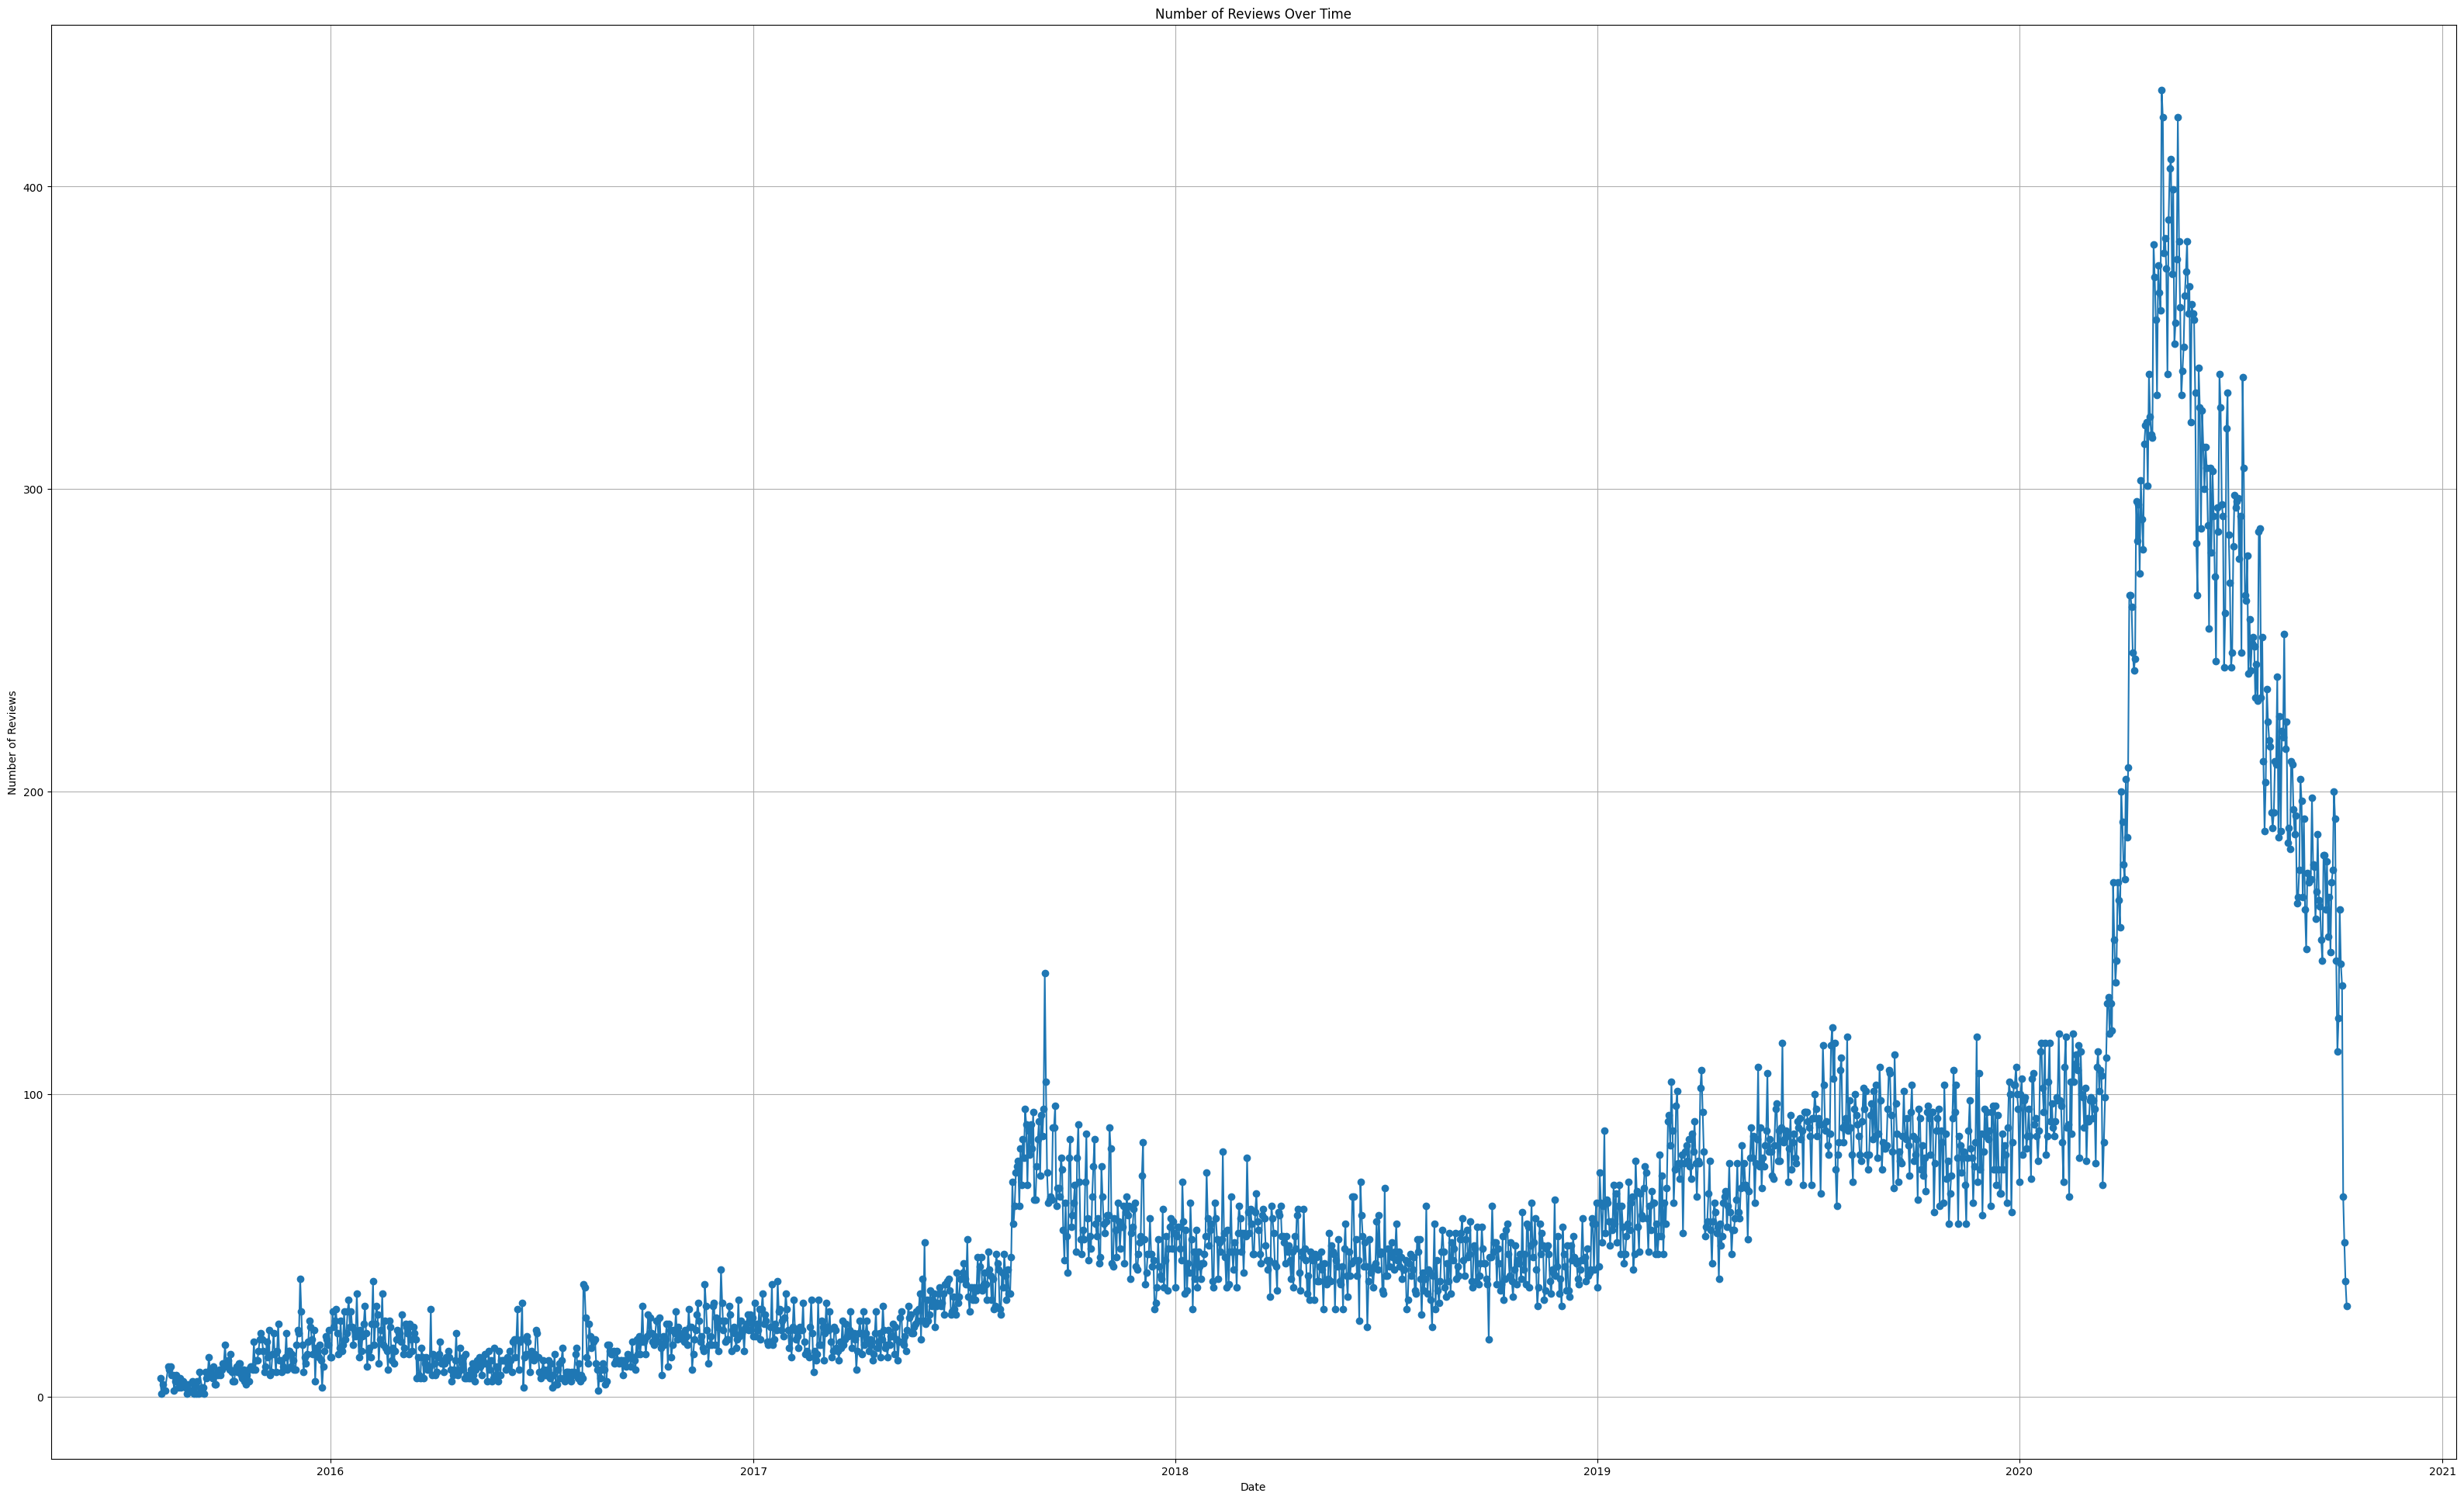

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate by date to get the count of reviews per date
df_aggregated = df_cleaned.groupby('date_reviews').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(40, 24))
plt.plot(df_aggregated['date_reviews'], df_aggregated['review_count'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.grid(True)
plt.show()

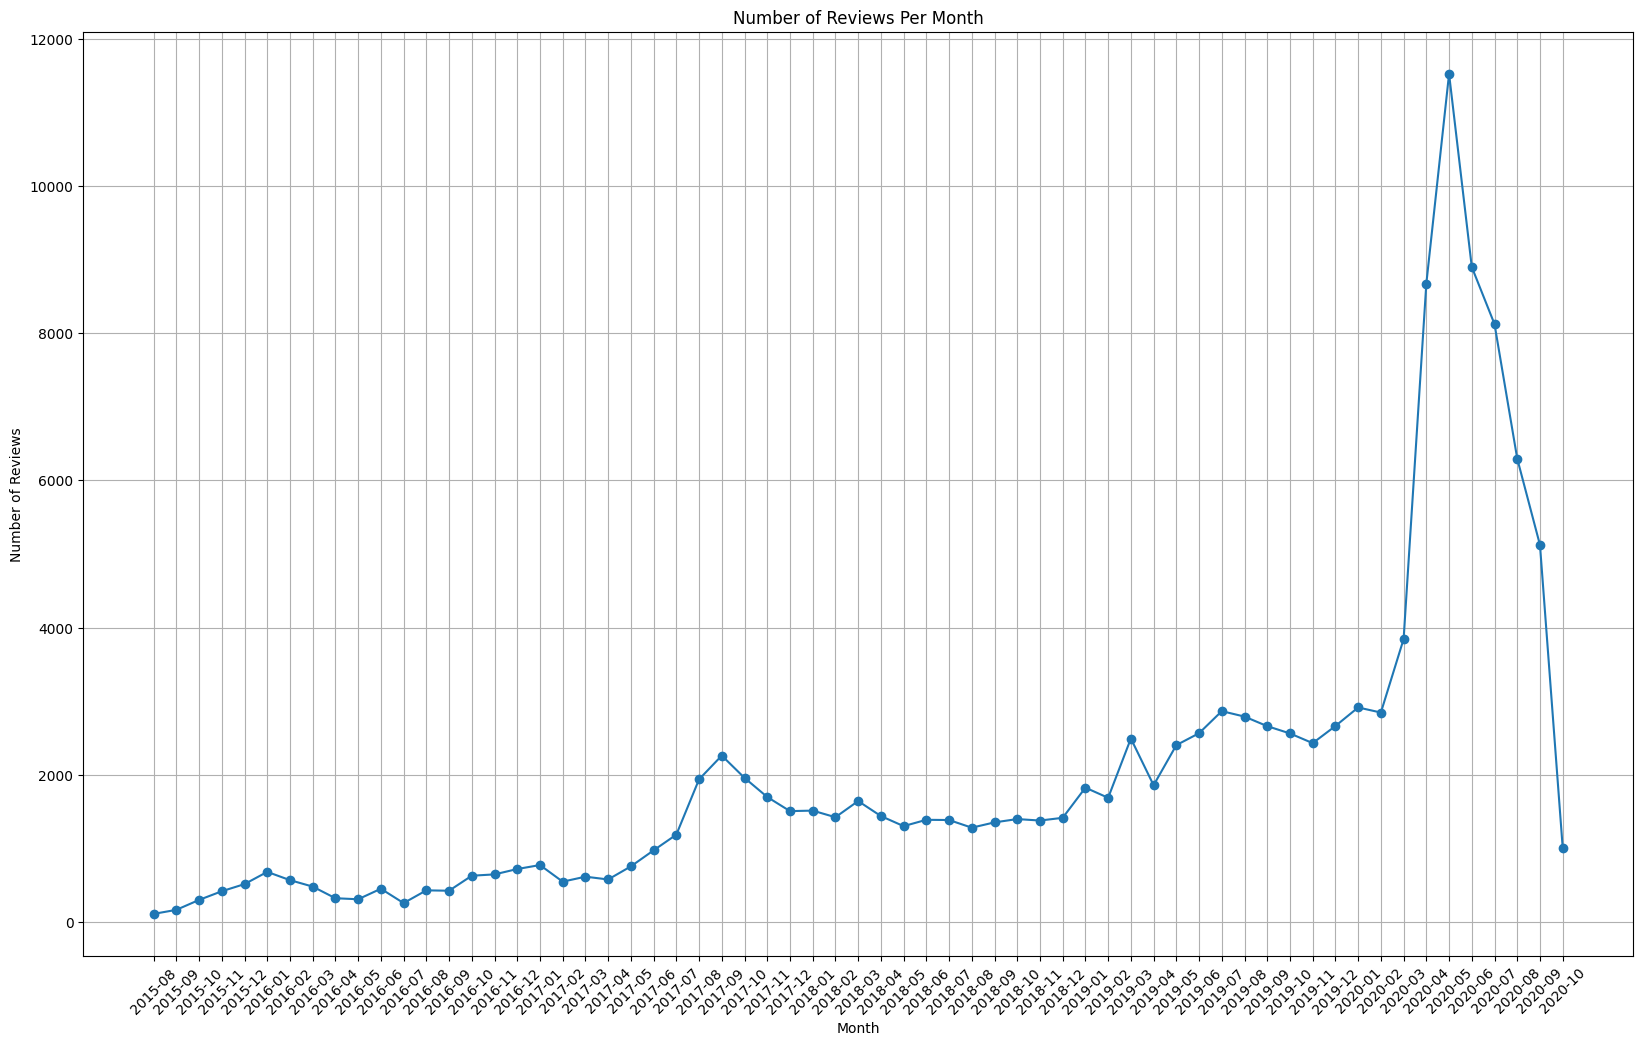

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cleaned is your DataFrame and 'date_reviews' is the date column
# Convert 'date_reviews' to datetime format
df_cleaned['date_reviews'] = pd.to_datetime(df_cleaned['date_reviews'], format='%b %d, %Y')

# Group by month and count the reviews per month
df_cleaned['month'] = df_cleaned['date_reviews'].dt.to_period('M')
df_aggregated = df_cleaned.groupby('month').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(df_aggregated['month'].astype(str), df_aggregated['review_count'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

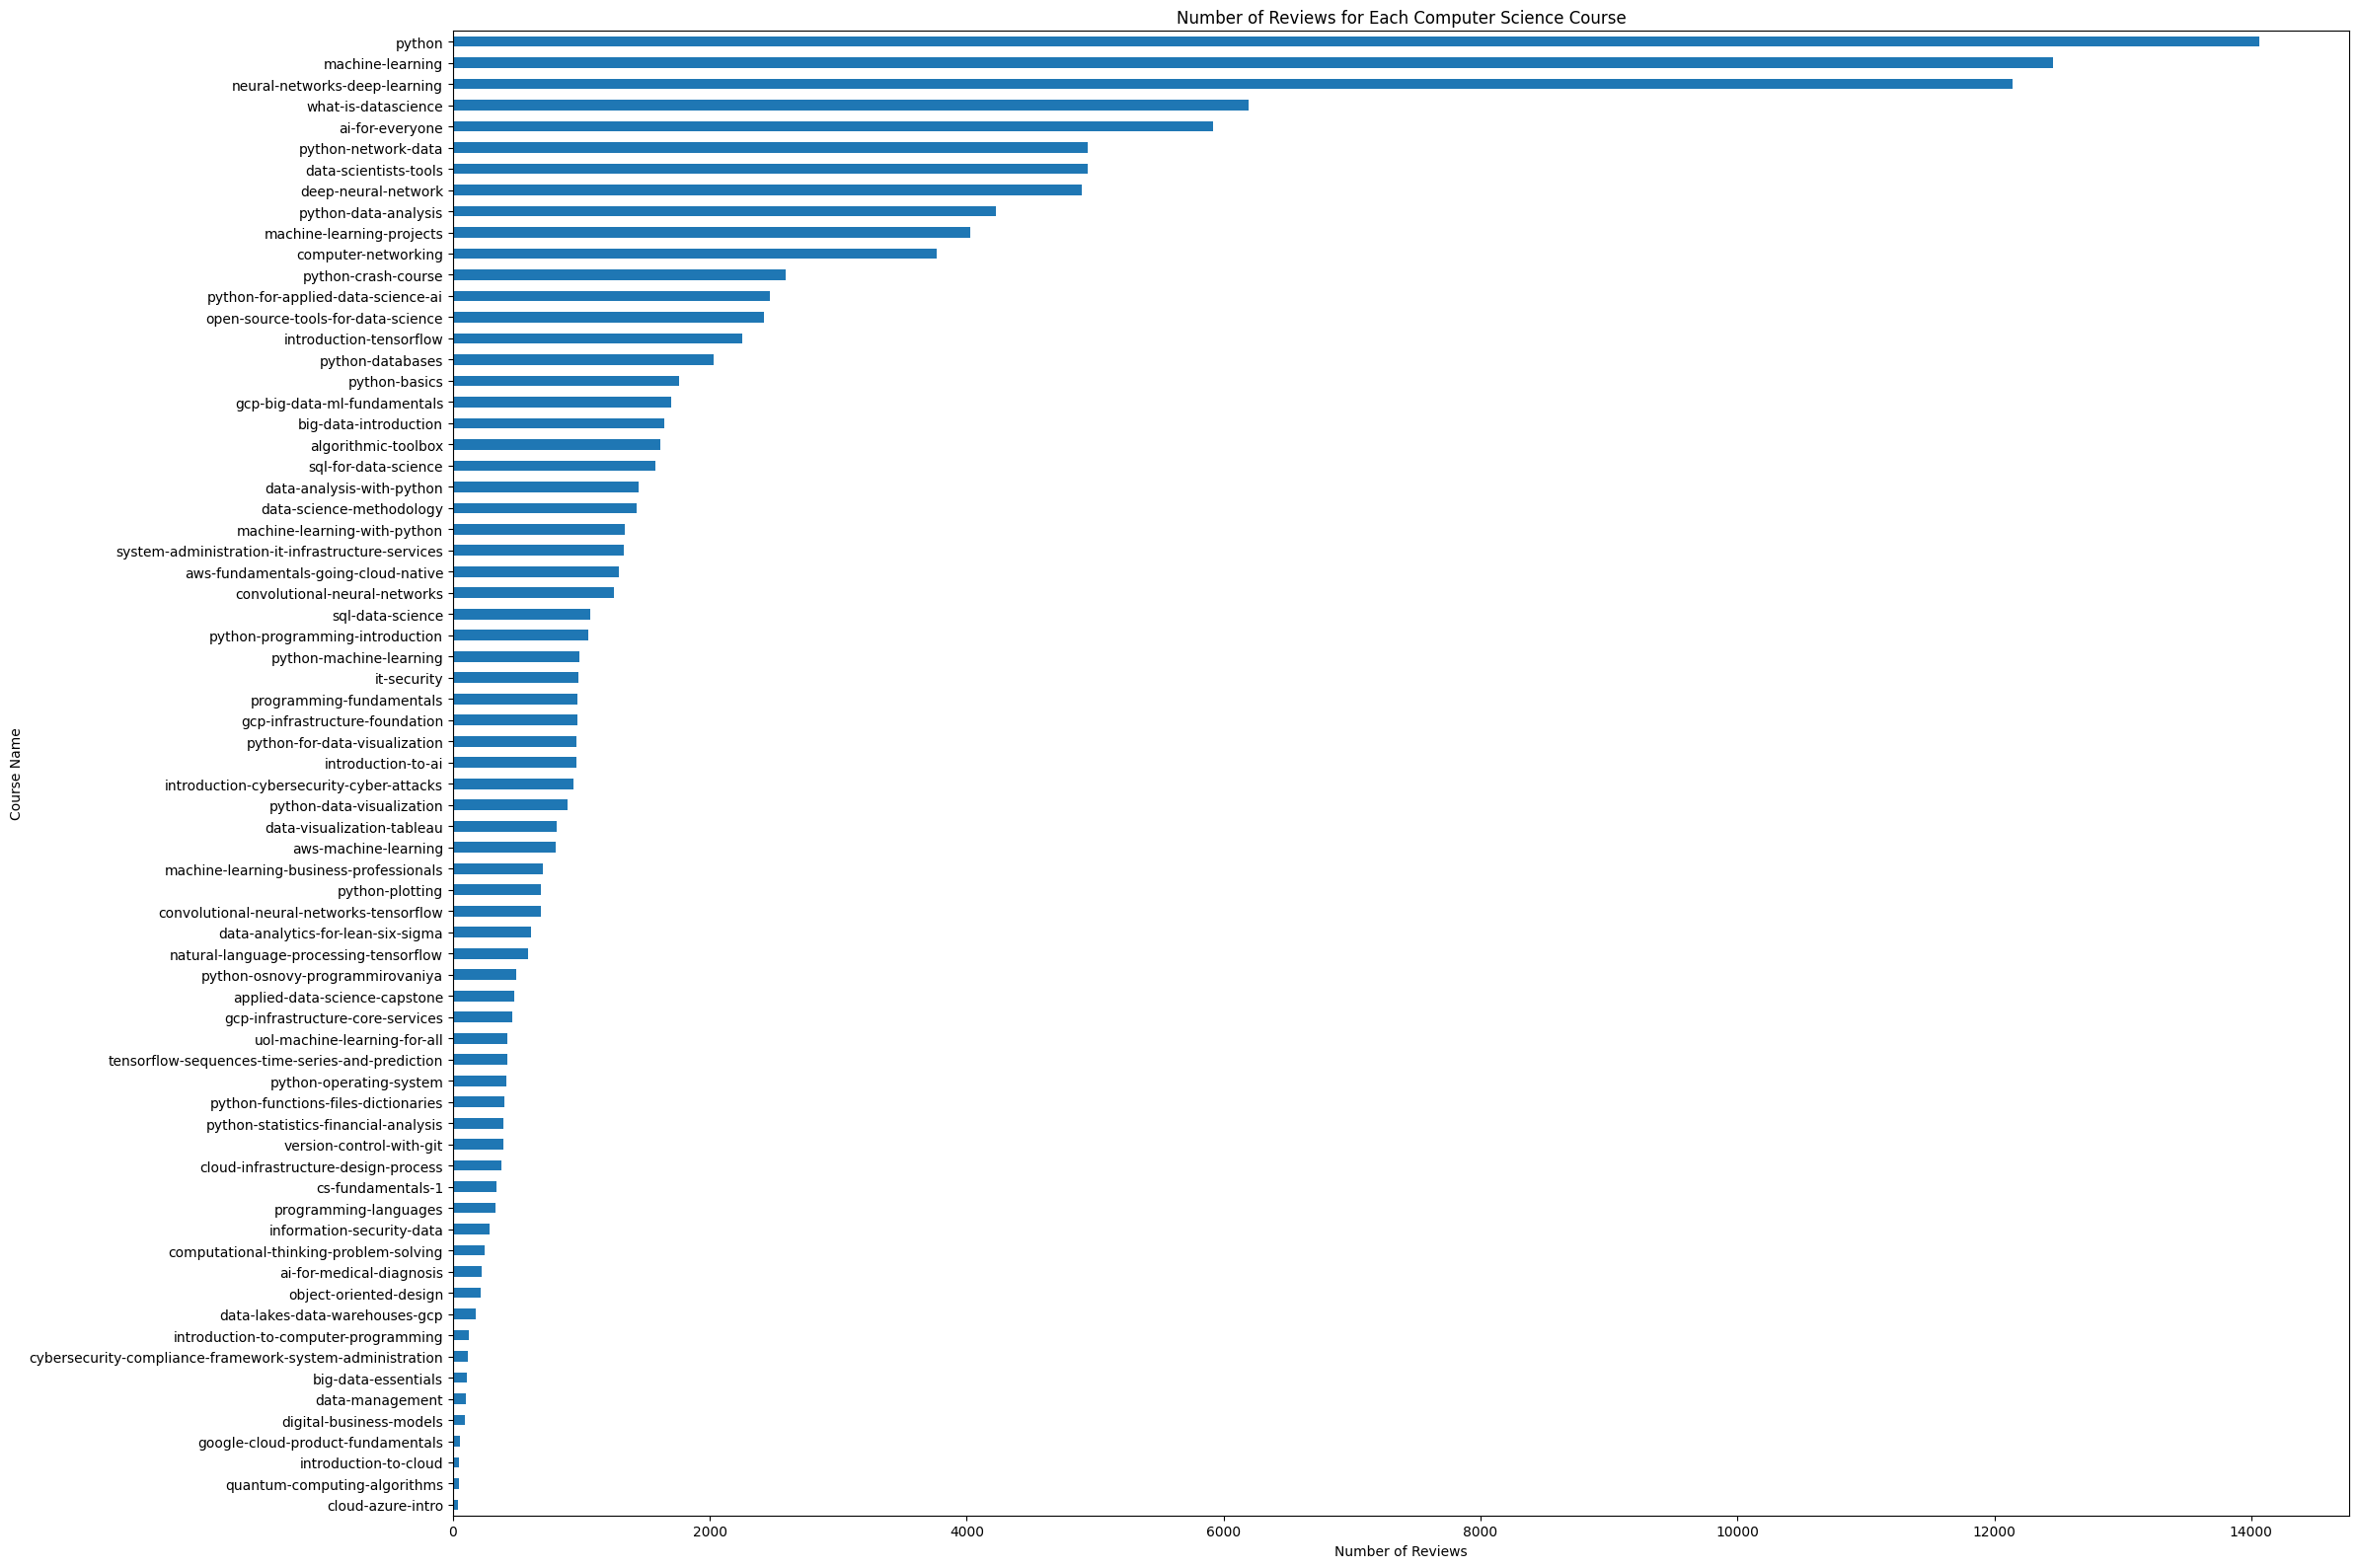

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = [
    'python-data-analysis', 'python', 'computer-networking', 'python-crash-course',
    'neural-networks-deep-learning', 'what-is-datascience',
    'introduction-tensorflow', 'open-source-tools-for-data-science',
    'deep-neural-network', 'sql-for-data-science', 'system-administration-it-infrastructure-services',
    'introduction-cybersecurity-cyber-attacks', 'data-scientists-tools',
    'convolutional-neural-networks-tensorflow', 'python-network-data',
    'machine-learning-projects', 'convolutional-neural-networks',
    'python-basics', 'it-security', 'cs-fundamentals-1',
    'gcp-big-data-ml-fundamentals', 'sql-data-science', 
    'natural-language-processing-tensorflow', 'python-operating-system',
    'programming-fundamentals', 'python-statistics-financial-analysis',
    'machine-learning', 'python-databases', 'ai-for-everyone',
    'data-analysis-with-python', 'machine-learning-with-python',
    'python-programming-introduction', 'uol-machine-learning-for-all',
    'python-data-visualization', 'introduction-to-cloud',
    'cloud-infrastructure-design-process', 'aws-fundamentals-going-cloud-native',
    'tensorflow-sequences-time-series-and-prediction',
    'computational-thinking-problem-solving', 'introduction-to-computer-programming',
    'python-functions-files-dictionaries', 'programming-languages',
    'data-analytics-for-lean-six-sigma', 'big-data-introduction',
    'python-for-applied-data-science-ai', 'big-data-essentials',
    'python-plotting', 'version-control-with-git',
    'data-visualization-tableau', 'ai-for-medical-diagnosis',
    'python-for-data-visualization', 'python-machine-learning',
    'google-cloud-product-fundamentals', 'building-modern-python-applications-on-aws',
    'data-lakes-data-warehouses-gcp', 'introduction-to-ai',
    'algorithmic-toolbox', 'gcp-infrastructure-foundation', 
    'aws-machine-learning', 'machine-learning-business-professionals',
    'object-oriented-design', 'neuroeconomics', 'cloud-azure-intro',
    'data-science-methodology', 'gcp-infrastructure-core-services', 
    'data-management', 'quantum-computing-algorithms',
    'digital-business-models', 'cybersecurity-compliance-framework-system-administration',
    'python-osnovy-programmirovaniya', 'applied-data-science-capstone',
    'computer-science', 'information-security-data'
]

# Filter the DataFrame for these courses
filtered_df = df_cleaned[df_cleaned['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()


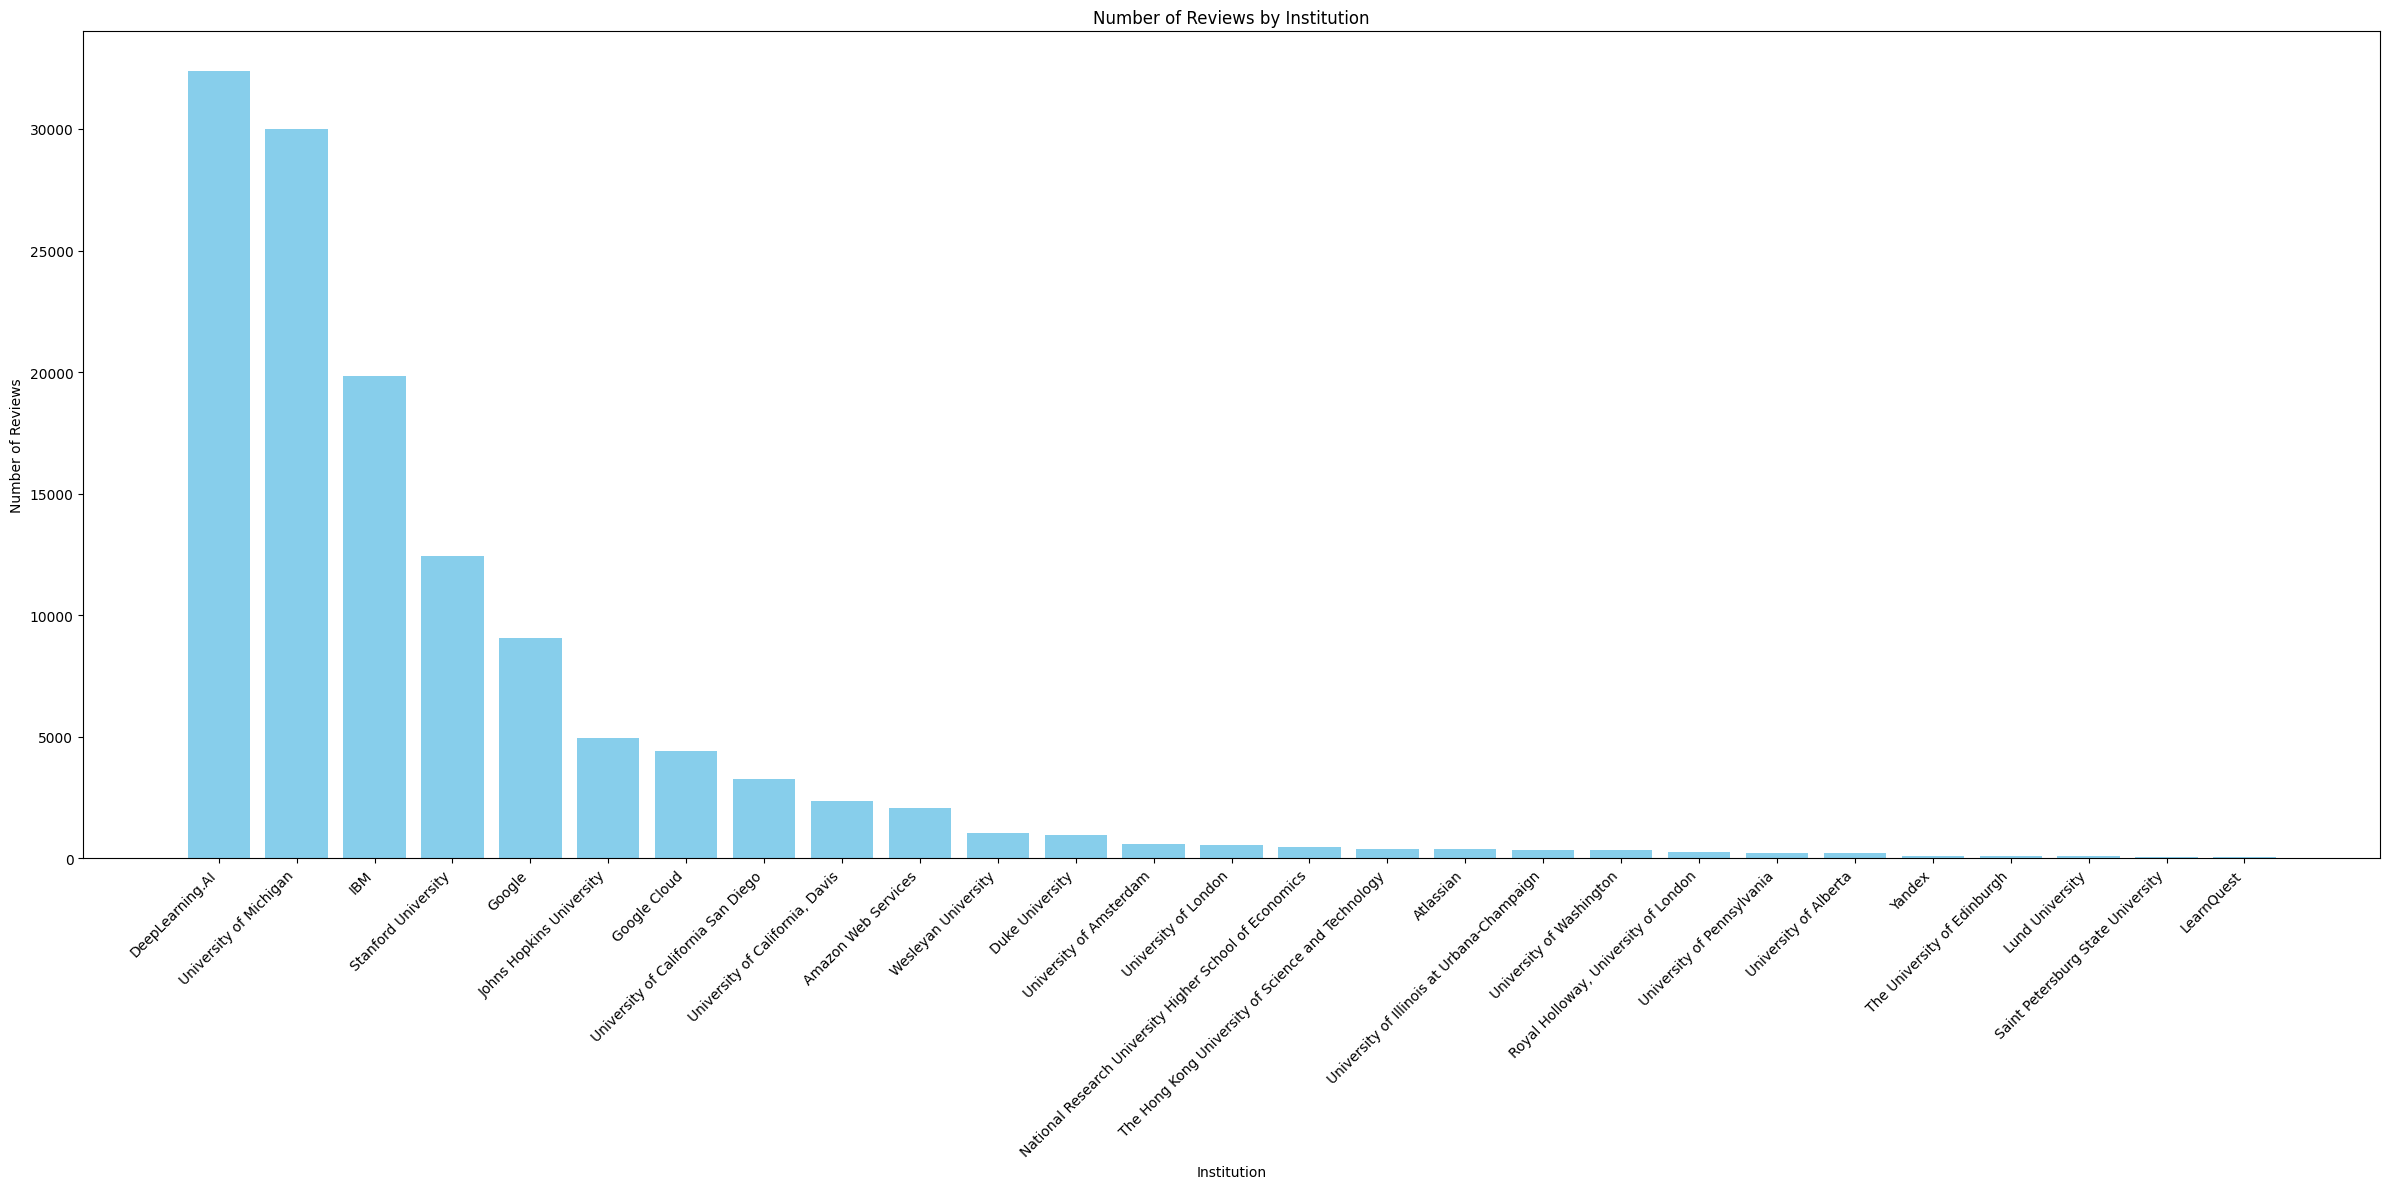

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of institutions to filter
institutions = [
    'University of Michigan', 'Google', 'DeepLearning.AI', 'IBM',
    'University of Pennsylvania', 'University of California, Davis',
    'Johns Hopkins University', 'University of Illinois at Urbana-Champaign',
    'Google Cloud', 'Amazon Web Services', 'University of London',
    'University of California San Diego',
    'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 'Atlassian',
    'National Research University Higher School of Economics',
    'Wesleyan University', 'LearnQuest', 'University of Alberta',
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 'Yandex',
    'The University of Edinburgh', 'Stanford University'
]

# Count occurrences of each institution
institution_counts = df_cleaned['institution'].value_counts()

# Filter counts for specified institutions
filtered_counts = institution_counts[institution_counts.index.isin(institutions)]

# Reset index to turn the Series into a DataFrame
filtered_counts = filtered_counts.reset_index()
filtered_counts.columns = ['institution', 'count']

# Plotting
plt.figure(figsize=(24, 12))
plt.bar(filtered_counts['institution'], filtered_counts['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Reviews by Institution')
plt.xlabel('Institution')
plt.ylabel('Number of Reviews')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


Checking the number of reviews that come from university institutions

In [47]:
import pandas as pd


# Count total reviews
total_reviews = df_cleaned.shape[0]

# Filter for rows that contain 'University' or 'Higher'
university_reviews = df_cleaned[
    df_cleaned['institution'].str.contains('University|Higher', case=False, na=False)
]

# Count university reviews
university_count = university_reviews.shape[0]

# Calculate percentage
percentage_universities = (university_count / total_reviews) * 100

# Display the results
print(f'Total Reviews: {total_reviews}')
print(f'University Reviews: {university_count}')
print(f'Percentage of Reviews from Universities: {percentage_universities:.2f}%')


Total Reviews: 127126
University Reviews: 58729
Percentage of Reviews from Universities: 46.20%


In [48]:
len(institutions)

27

# A summary of the analysis #
* entries with no reviews were removed, of which there were 153 originally
* The two datasets were joined based on their course_id, resulting in duplicates, which were removed
* entries with less than 20 characters were removed, as based on a quick analysis, not much could be drawn from single words and such. There were over 60,000 such reviews
* The number of reviews by instituions were analysed, to determine if the type of data would be useful, where out of all of the institutions, 70% of them are universities and University Reviews: 58976 and Percentage of Reviews from Universities: 46.30%.
* It may be worth removing non-university reviews, since 58, 976 entries is more than enough data.

# Removing All Non-University Reviews #

In [49]:
import pandas as pd

# List of university institutions
universities = [
    'University of Michigan', 'University of Pennsylvania', 
    'University of California, Davis', 'Johns Hopkins University', 
    'University of Illinois at Urbana-Champaign', 'University of London',
    'University of California San Diego', 'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 
    'National Research University Higher School of Economics',
    'Wesleyan University', 'University of Alberta', 
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 
    'The University of Edinburgh', 'Stanford University'
]

# Create a new DataFrame with only university institutions
df_universities = df_cleaned[df_cleaned['institution'].isin(universities)]

# Display the new DataFrame
df_universities


reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
432919  Great for beginners in programming and people ...   2020-10-08   
432920  nice hope Charles sir gonna come up with more ...   2020-10-08   
432925  This course is so good. I can easily understan...   2020-10-06   
432931  Love it! Even though it isn't my first python ...   2020-10-06   
432932  Really good introduction to python! This progr...   2020-10-06   

        rating course_id    month       departments  \
0            1    python  2017-10  Computer Science   
1            1    python  2017-08  Computer Science   
2            1    python  2019-03  Computer Science   
3            1    python  2015-10  Computer Science   
4            1    python  2016-05  Computer Science   
...        ...       ...      ...               ...   
432919       5    python  2020-10  Computer Science   
432920       5    python  2020-10  Computer Science   
432925       5    python  2020-10  Computer Science   
432931       5    python  2020-10  Computer Science   
432932       5    python  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
432919  Programming for Everybody (Getting Started wit...   
432920  Programming for Everybody (Getting Started wit...   
432925  Programming for Everybody (Getting Started wit...   
432931  Programming for Everybody (Getting Started wit...   
432932  Programming for Everybody (Getting Started wit...   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
432919  University of Michigan  
432920  University of Michigan  
432925  University of Michigan  
432931  University of Michigan  
432932  University of Michigan  

[58729 rows x 8 columns]

In [50]:
df_universities.to_csv('~/cs310/datasets/data_universities_only.csv', index=False)

In [51]:
# Assuming 'course_id' is the column with course names
df_universities = df_universities[df_universities['course_id'] != 'neuroeconomics']


In [52]:
df_universities.to_csv('~/cs310/datasets/data_universities_only.csv', index=False)

# Analysis of University Reviews Only #

In [53]:
df_universities['course_id'].unique()

array(['python', 'computational-thinking-problem-solving',
       'python-data-analysis', 'sql-for-data-science',
       'data-scientists-tools', 'python-network-data', 'python-basics',
       'cs-fundamentals-1', 'data-visualization-tableau',
       'uol-machine-learning-for-all', 'python-databases',
       'algorithmic-toolbox', 'python-statistics-financial-analysis',
       'programming-fundamentals', 'python-data-visualization',
       'data-analytics-for-lean-six-sigma',
       'python-functions-files-dictionaries',
       'python-osnovy-programmirovaniya',
       'python-programming-introduction', 'object-oriented-design',
       'information-security-data', 'programming-languages',
       'quantum-computing-algorithms', 'python-plotting',
       'digital-business-models', 'introduction-to-computer-programming',
       'python-machine-learning', 'big-data-introduction',
       'data-management', 'machine-learning'], dtype=object)

In [54]:
len(df_universities['course_id'].unique()) # 30 different modules with all at least 30 reviews is more than sufficient for the application

30

University Module reviews overtime

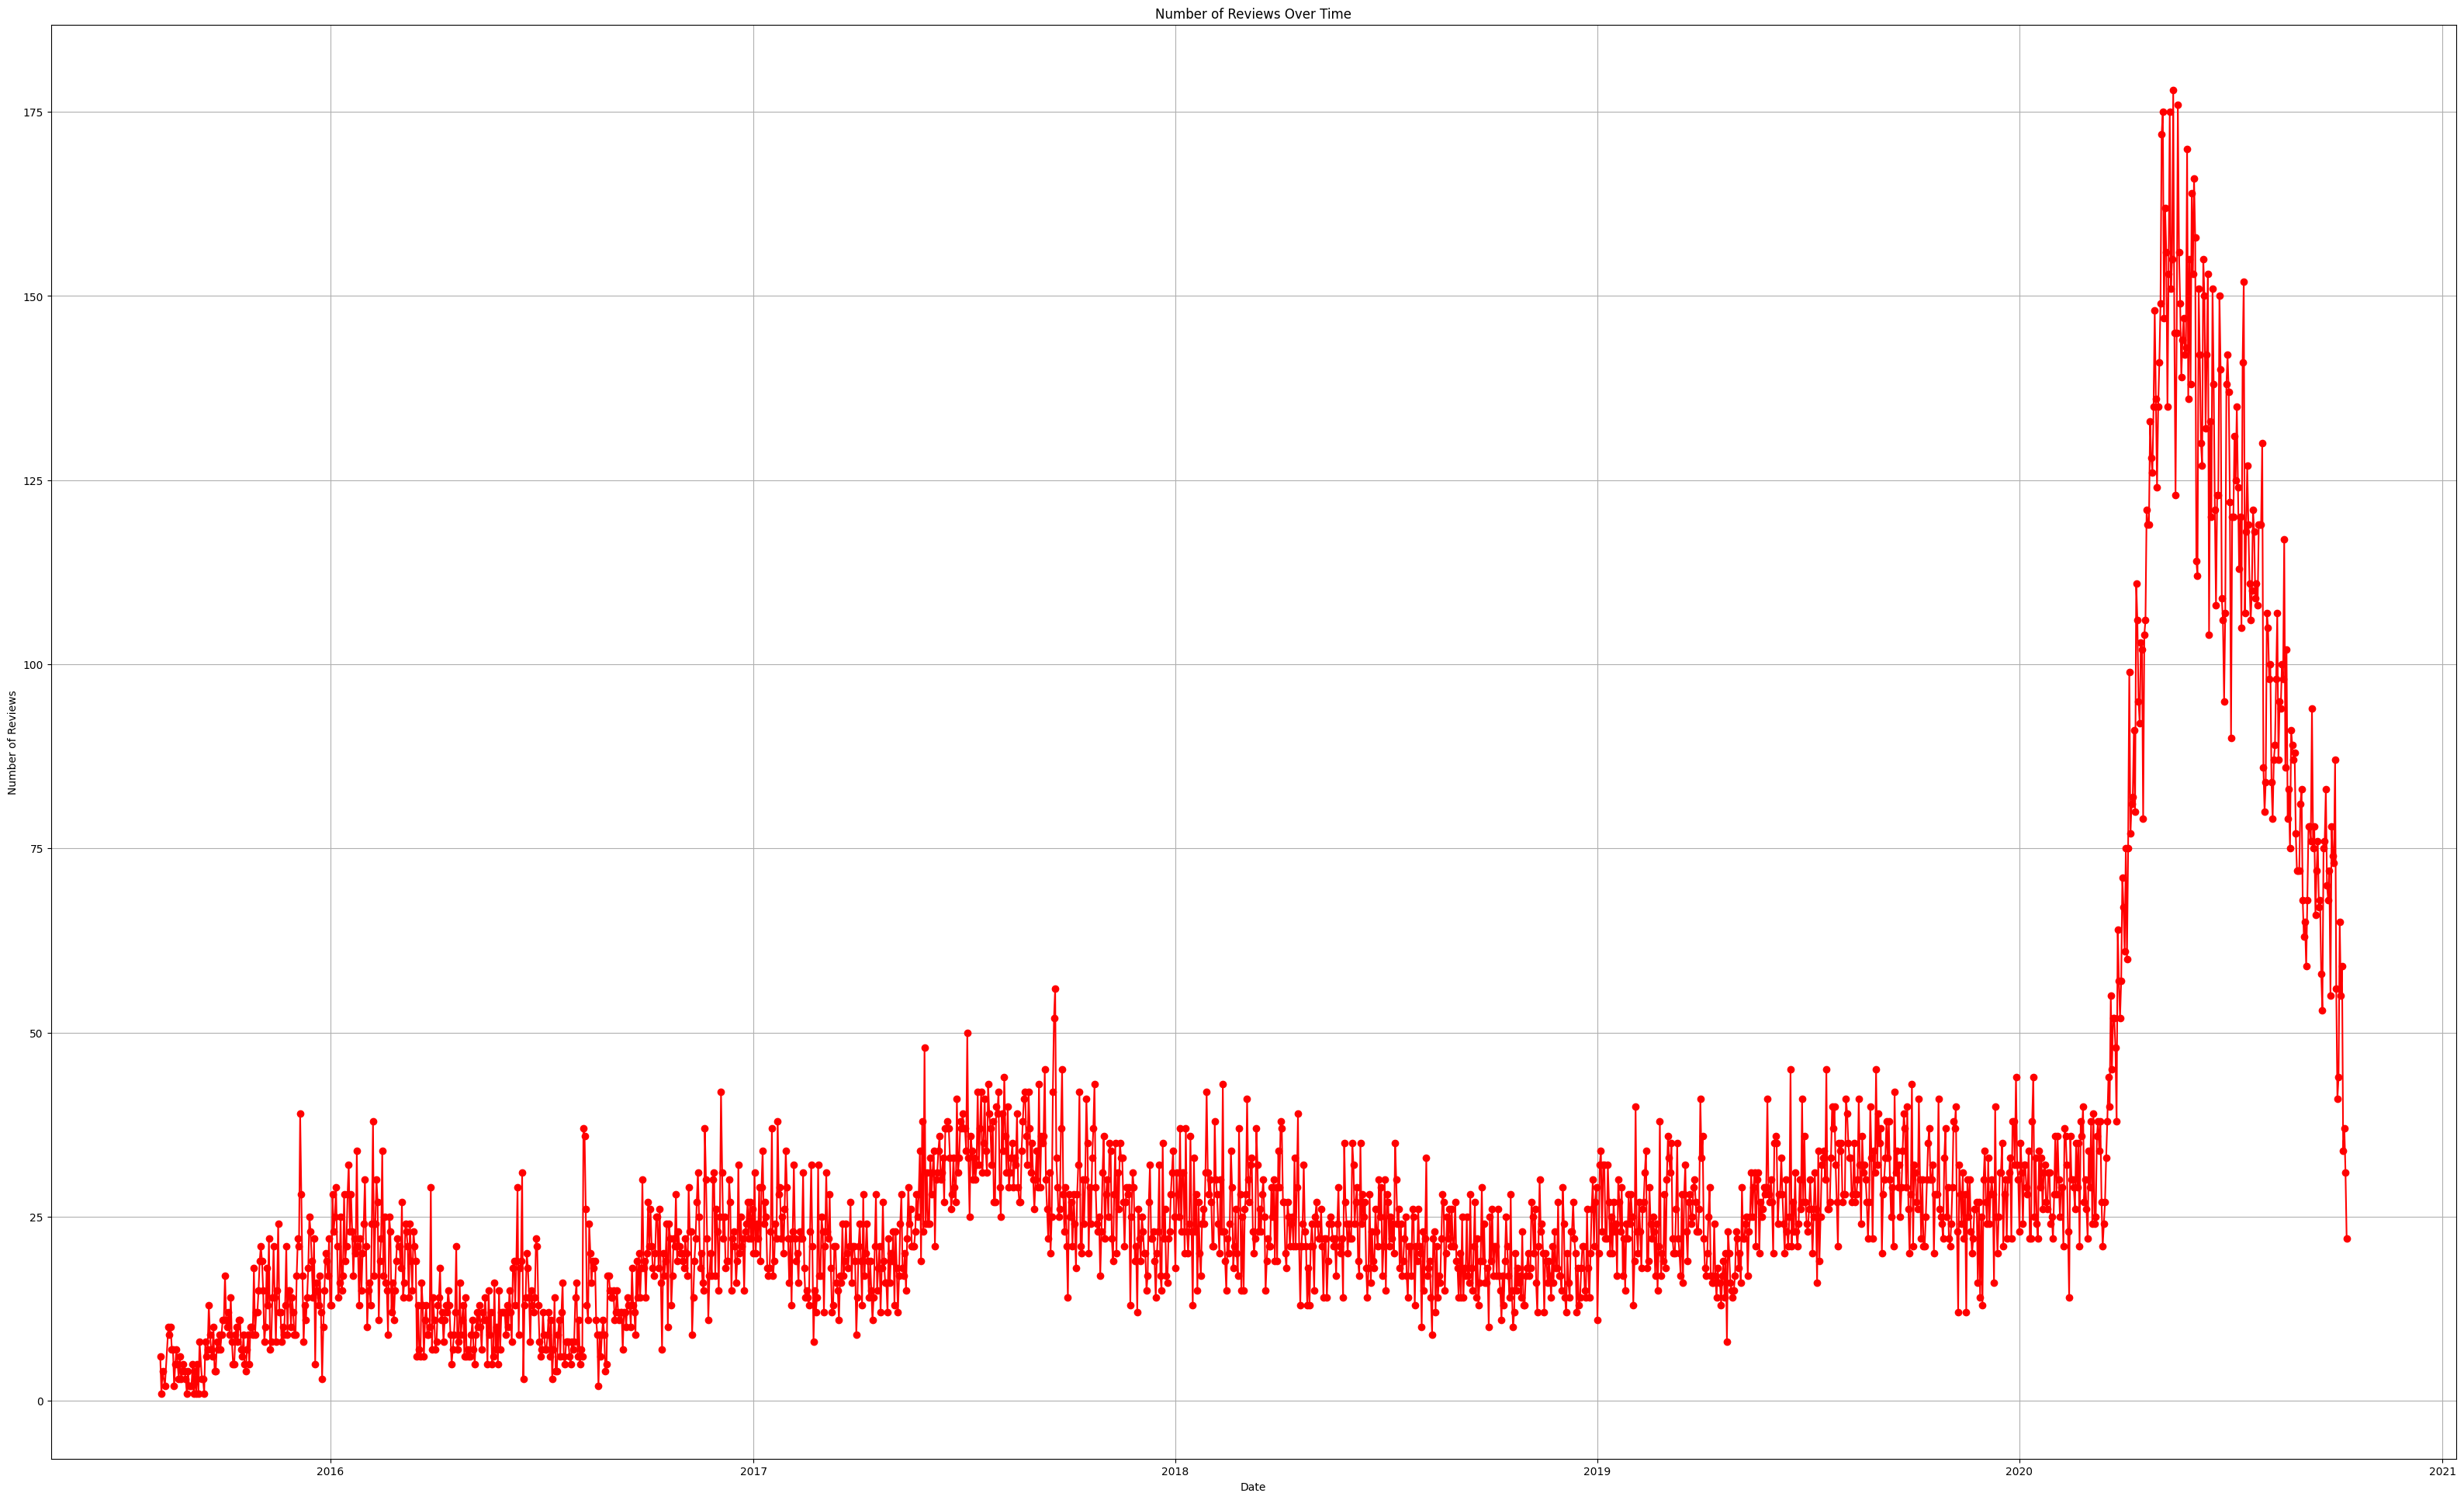

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate by date to get the count of reviews per date
df_aggregated = df_universities.groupby('date_reviews').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(40, 24))
plt.plot(df_aggregated['date_reviews'], df_aggregated['review_count'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.grid(True)
plt.show()

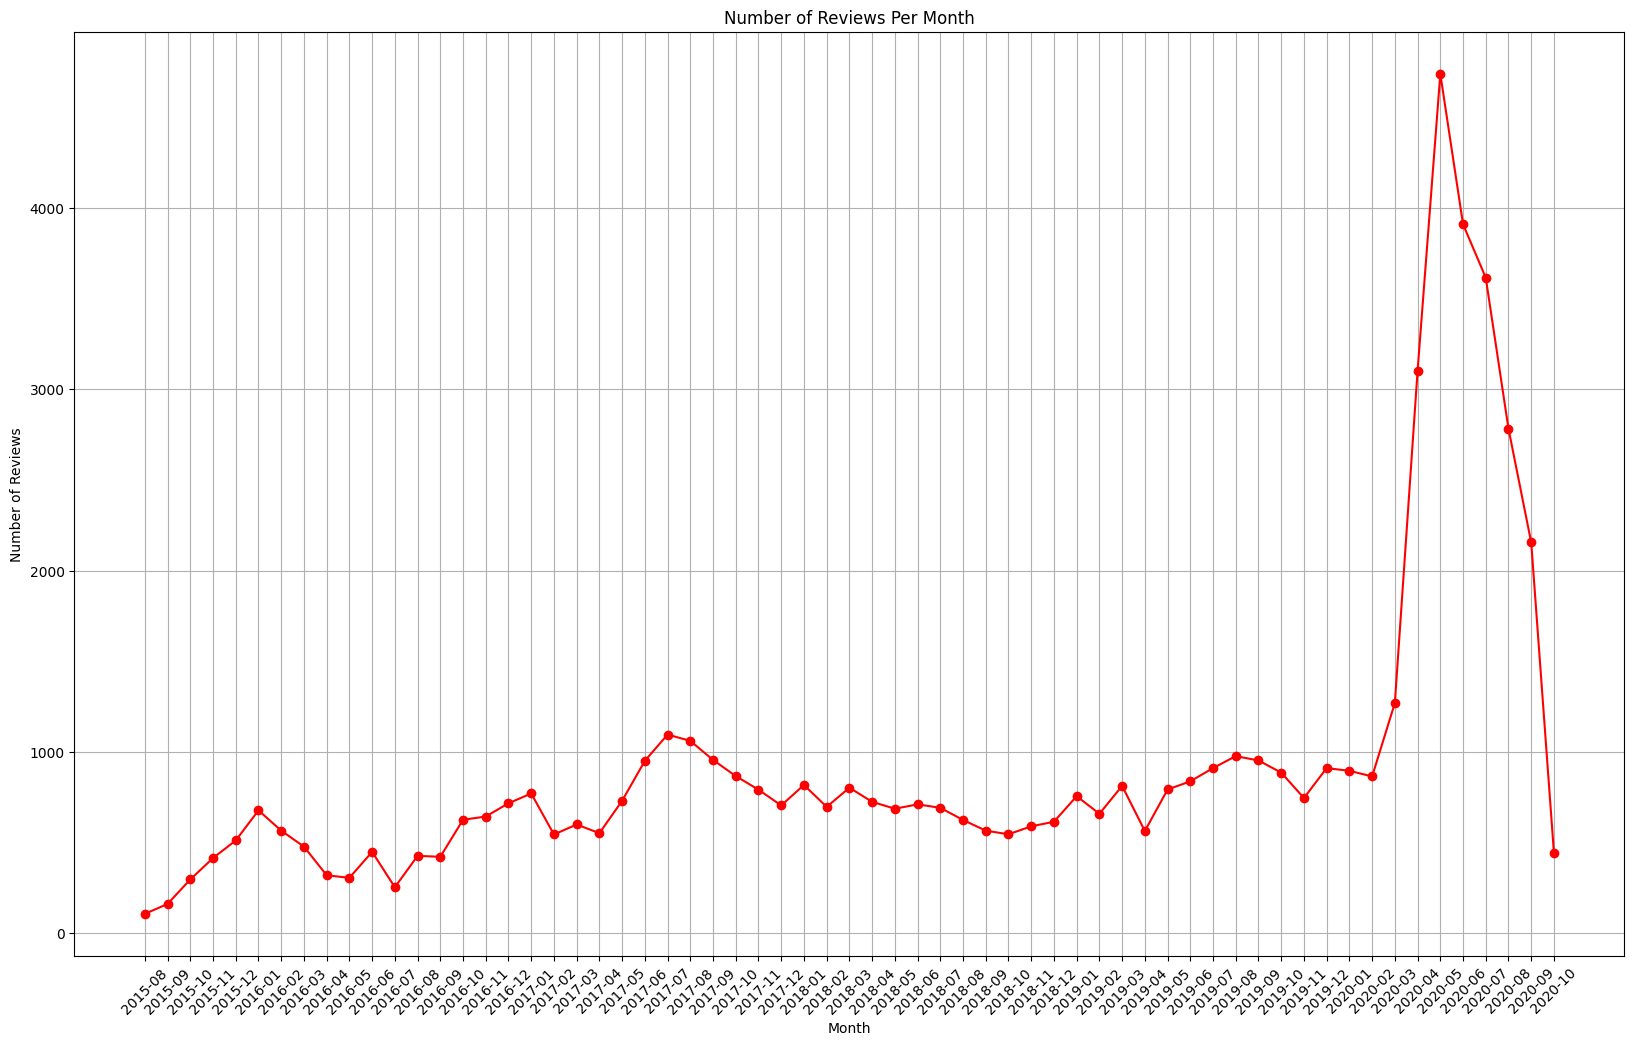

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_universities is your DataFrame and 'date_reviews' is the date column

# Convert 'date_reviews' to datetime format, using .loc to avoid SettingWithCopyWarning
df_universities.loc[:, 'date_reviews'] = pd.to_datetime(df_universities['date_reviews'], format='%b %d, %Y')

# Create a new column 'month' based on 'date_reviews'
df_universities.loc[:, 'month'] = df_universities['date_reviews'].dt.to_period('M')

# Group by month and count the reviews per month
df_aggregated = df_universities.groupby('month').size().reset_index(name='review_count')

# Plot the aggregated data
plt.figure(figsize=(20, 12))
plt.plot(df_aggregated['month'].astype(str), df_aggregated['review_count'], marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Per Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


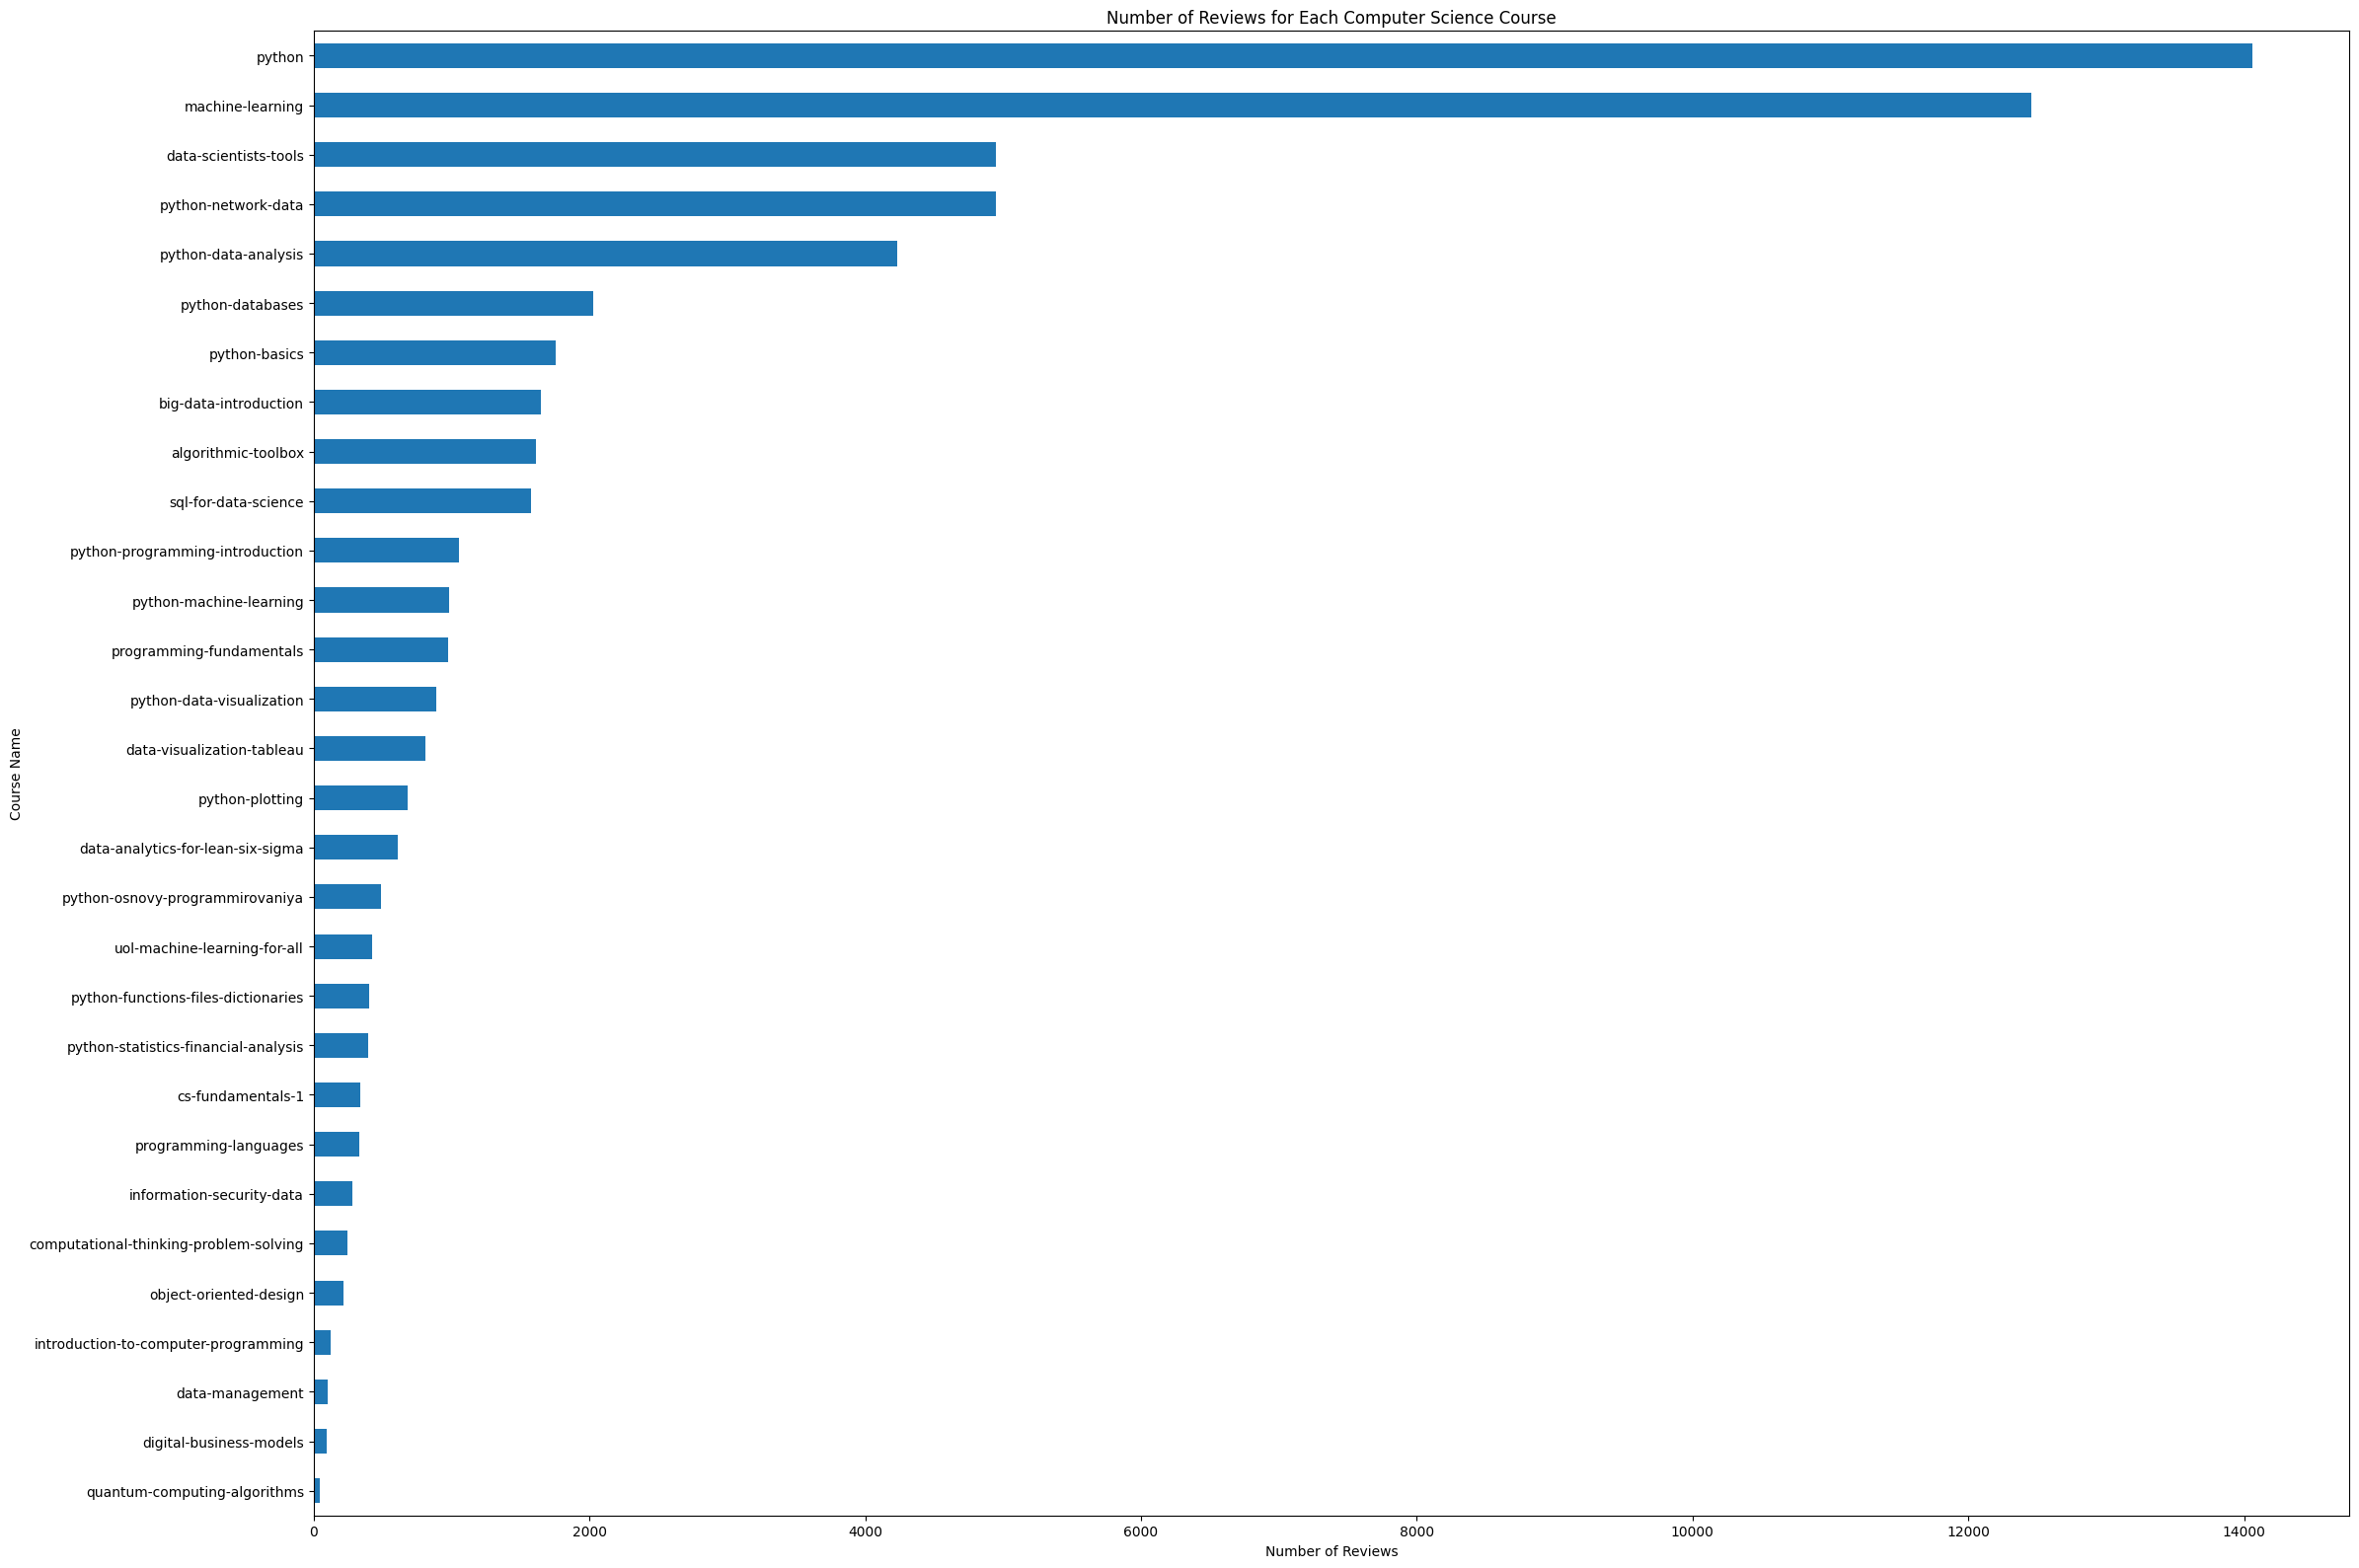

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses to filter
cs_courses = ['python', 'computational-thinking-problem-solving',
       'python-data-analysis', 'sql-for-data-science',
       'data-scientists-tools', 'python-network-data', 'python-basics',
       'cs-fundamentals-1', 'data-visualization-tableau',
       'uol-machine-learning-for-all', 'python-databases',
       'algorithmic-toolbox', 'python-statistics-financial-analysis',
       'programming-fundamentals', 'python-data-visualization',
       'data-analytics-for-lean-six-sigma',
       'python-functions-files-dictionaries',
       'python-osnovy-programmirovaniya',
       'python-programming-introduction', 'object-oriented-design',
       'information-security-data', 'programming-languages',
       'quantum-computing-algorithms', 'python-plotting',
       'digital-business-models',
       'introduction-to-computer-programming', 'python-machine-learning',
       'big-data-introduction', 'data-management', 'machine-learning']

# Filter the DataFrame for these courses
filtered_df = df_universities[df_universities['course_id'].isin(cs_courses)]

# Count the number of occurrences of reviews for each course
review_counts = filtered_df['course_id'].value_counts()

# Plot the results
plt.figure(figsize=(24, 16))
review_counts.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('Course Name')
plt.title('Number of Reviews for Each Computer Science Course')
plt.gca().invert_yaxis()  # To have the highest count at the top
plt.tight_layout()
plt.show()


<Figure size 2400x1200 with 0 Axes>

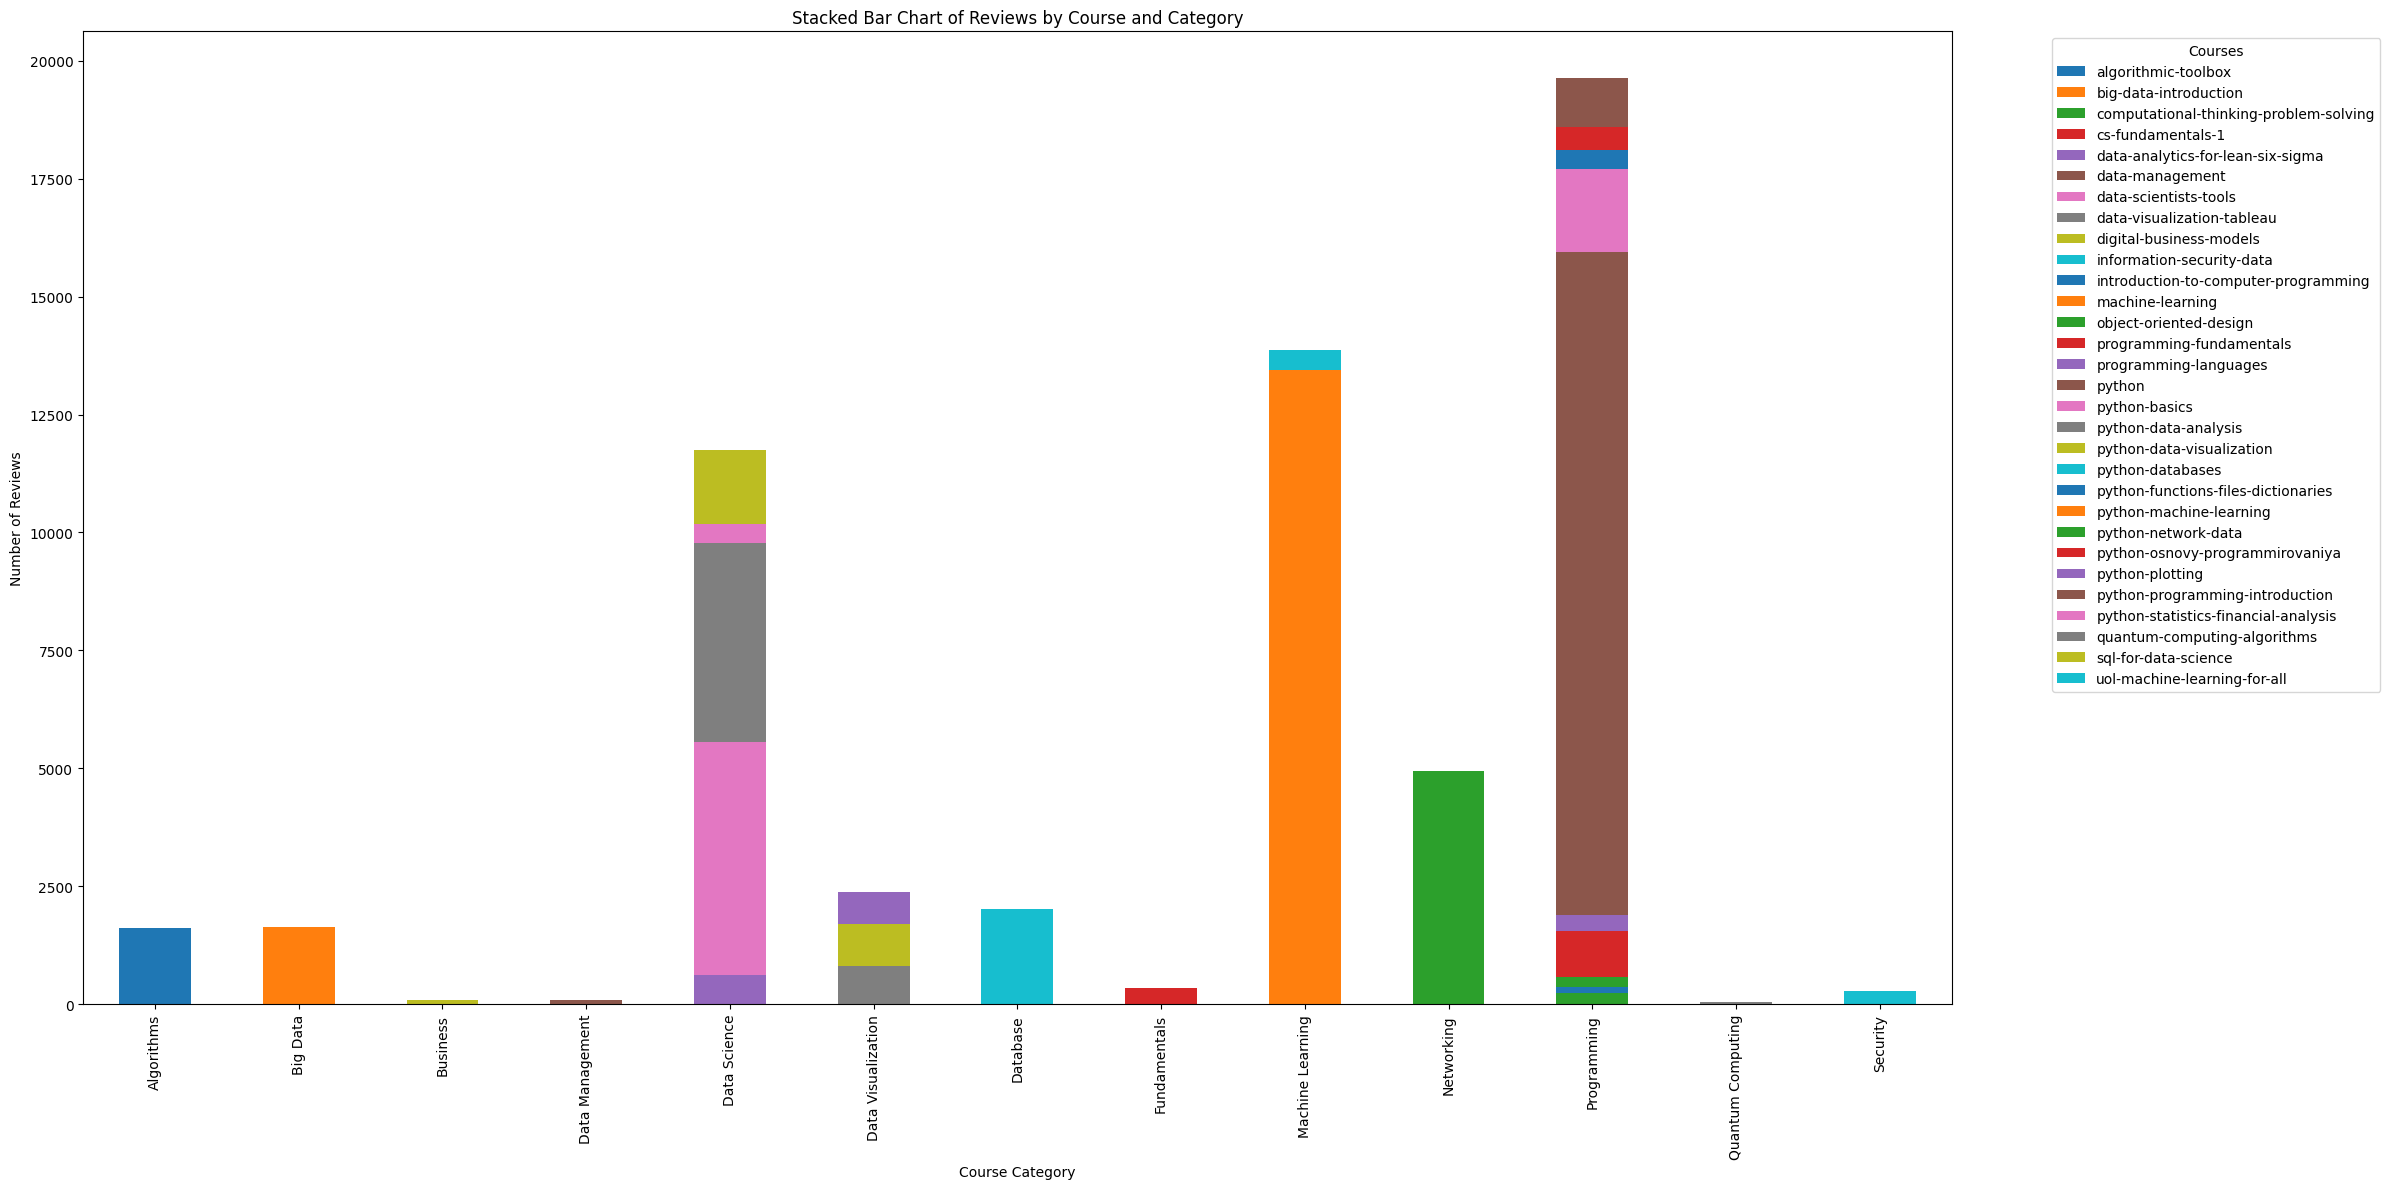

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# List of computer science courses and their categories
cs_courses = {
    'python': 'Programming',
    'computational-thinking-problem-solving': 'Programming',
    'python-data-analysis': 'Data Science',
    'sql-for-data-science': 'Data Science',
    'data-scientists-tools': 'Data Science',
    'python-network-data': 'Networking',
    'python-basics': 'Programming',
    'cs-fundamentals-1': 'Fundamentals',
    'data-visualization-tableau': 'Data Visualization',
    'uol-machine-learning-for-all': 'Machine Learning',
    'python-databases': 'Database',
    'algorithmic-toolbox': 'Algorithms',
    'python-statistics-financial-analysis': 'Data Science',
    'programming-fundamentals': 'Programming',
    'python-data-visualization': 'Data Visualization',
    'data-analytics-for-lean-six-sigma': 'Data Science',
    'python-functions-files-dictionaries': 'Programming',
    'python-osnovy-programmirovaniya': 'Programming',
    'python-programming-introduction': 'Programming',
    'object-oriented-design': 'Programming',
    'information-security-data': 'Security',
    'programming-languages': 'Programming',
    'quantum-computing-algorithms': 'Quantum Computing',
    'python-plotting': 'Data Visualization',
    'neuroeconomics': 'Miscellaneous',
    'digital-business-models': 'Business',
    'introduction-to-computer-programming': 'Programming',
    'python-machine-learning': 'Machine Learning',
    'big-data-introduction': 'Big Data',
    'data-management': 'Data Management',
    'machine-learning': 'Machine Learning'
}

# Add the categories as a column in your filtered DataFrame
filtered_df = df_universities[df_universities['course_id'].isin(cs_courses.keys())]
filtered_df['category'] = filtered_df['course_id'].map(cs_courses)

# Group by category and course, and count the reviews for each
df_grouped = filtered_df.groupby(['category', 'course_id']).size().unstack(fill_value=0)

# Plot the stacked bar chart
plt.figure(figsize=(24, 12))
df_grouped.plot(kind='bar', stacked=True, figsize=(24, 12))

plt.xlabel('Course Category')
plt.ylabel('Number of Reviews')
plt.title('Stacked Bar Chart of Reviews by Course and Category')
plt.legend(title='Courses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


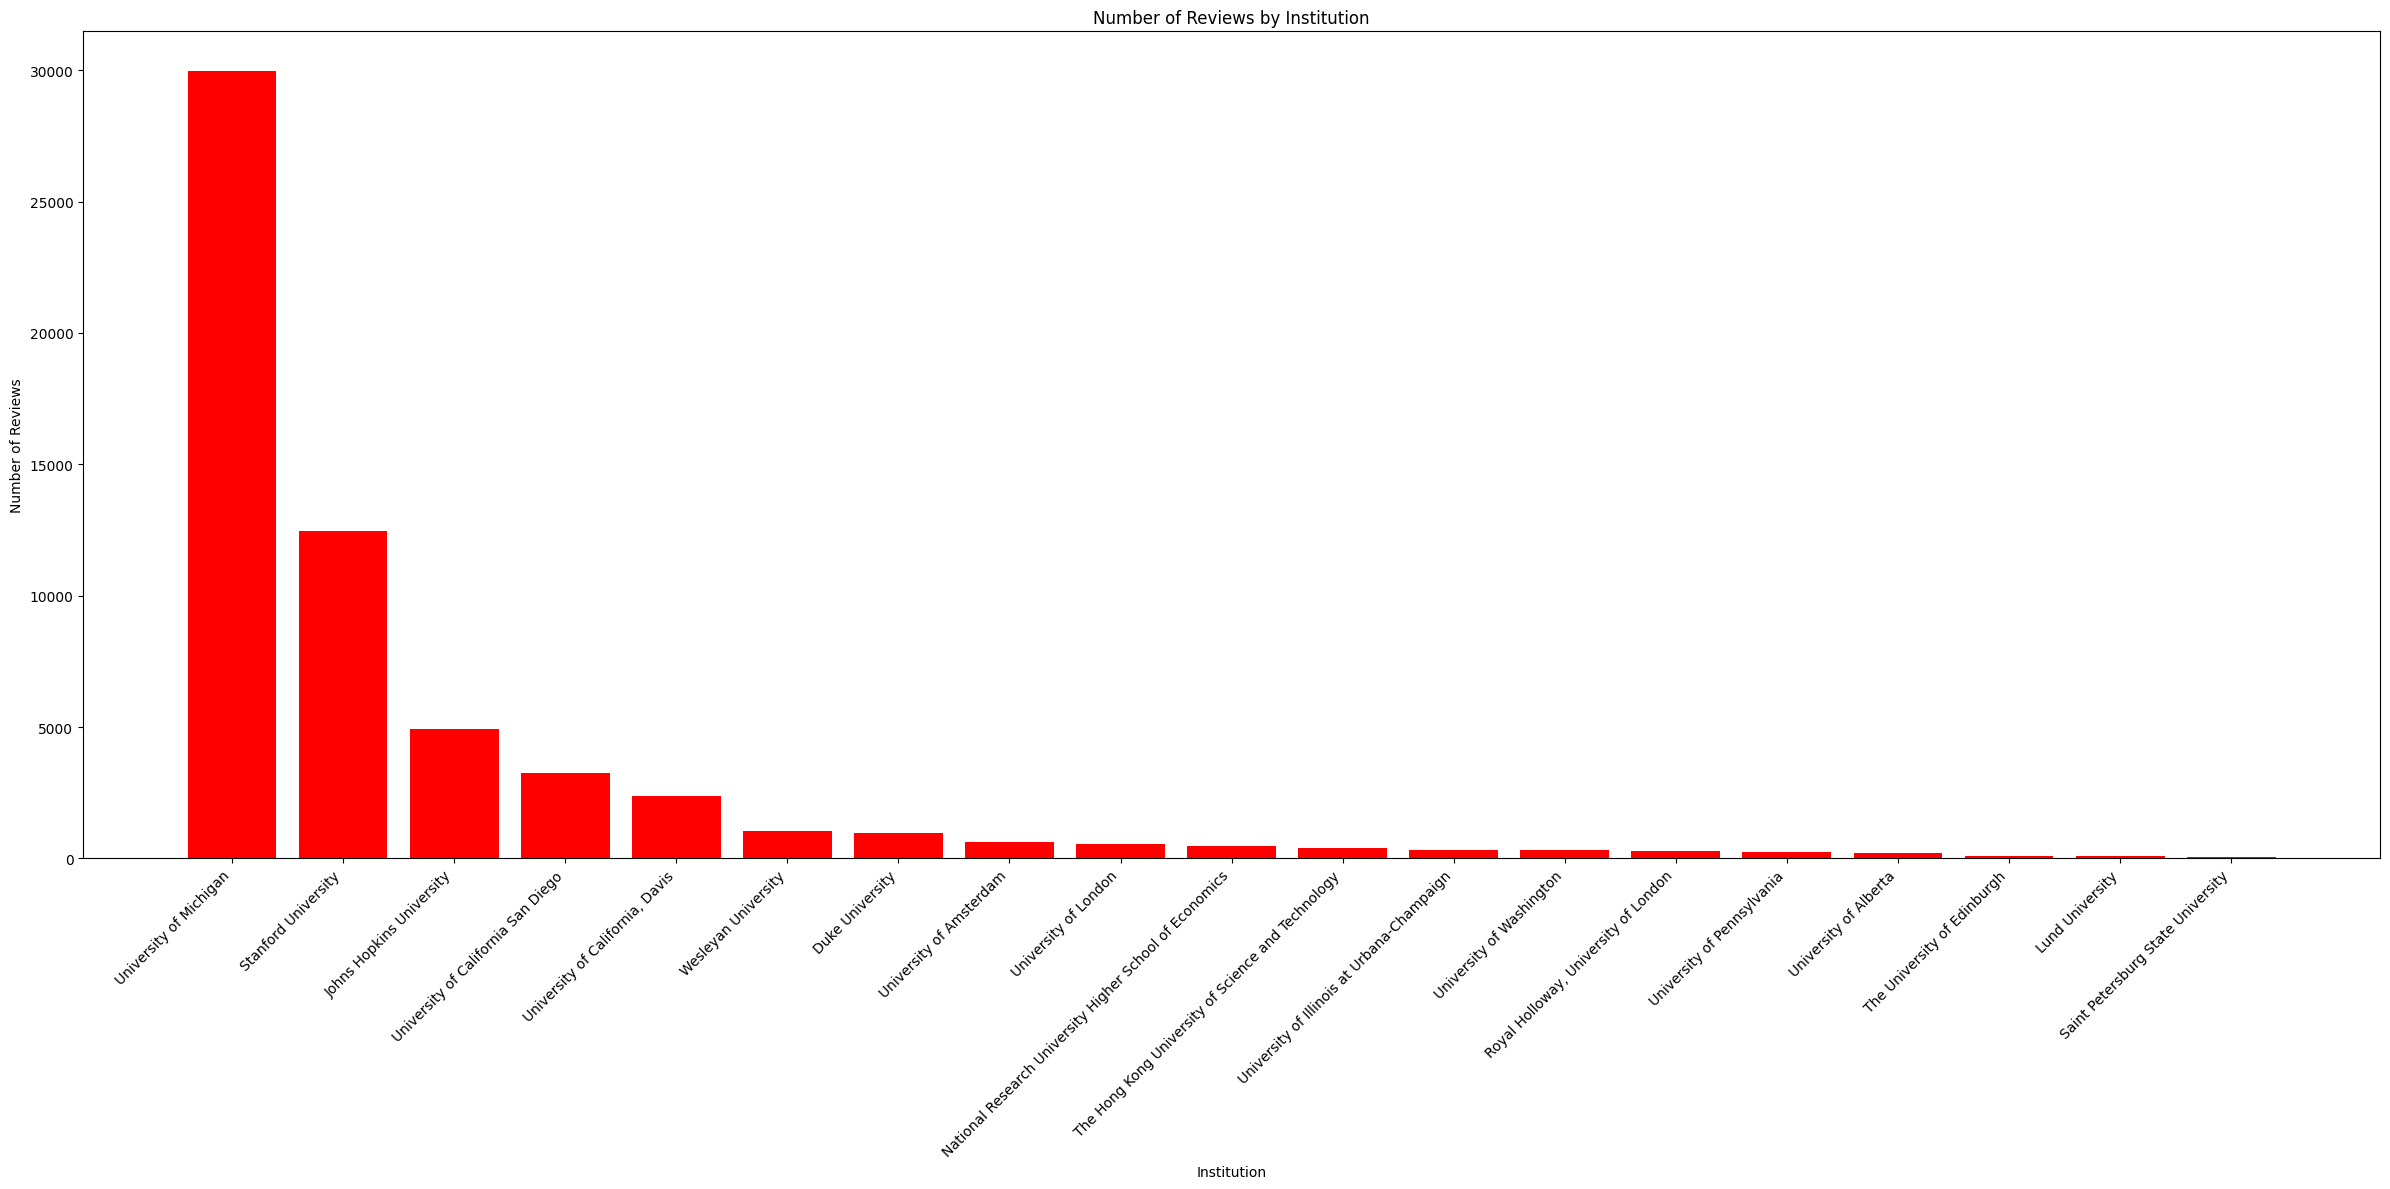

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# List of university institutions
institutions = [
    'University of Michigan', 'University of Pennsylvania', 
    'University of California, Davis', 'Johns Hopkins University', 
    'University of Illinois at Urbana-Champaign', 'University of London',
    'University of California San Diego', 'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 
    'National Research University Higher School of Economics',
    'Wesleyan University', 'University of Alberta', 
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 
    'The University of Edinburgh', 'Stanford University'
]


# Count occurrences of each institution
institution_counts = df_cleaned['institution'].value_counts()

# Filter counts for specified institutions
filtered_counts = institution_counts[institution_counts.index.isin(institutions)]

# Reset index to turn the Series into a DataFrame
filtered_counts = filtered_counts.reset_index()
filtered_counts.columns = ['institution', 'count']

# Plotting
plt.figure(figsize=(24, 12))
plt.bar(filtered_counts['institution'], filtered_counts['count'], color='red')
plt.xticks(rotation=45, ha='right')
plt.title('Number of Reviews by Institution')
plt.xlabel('Institution')
plt.ylabel('Number of Reviews')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

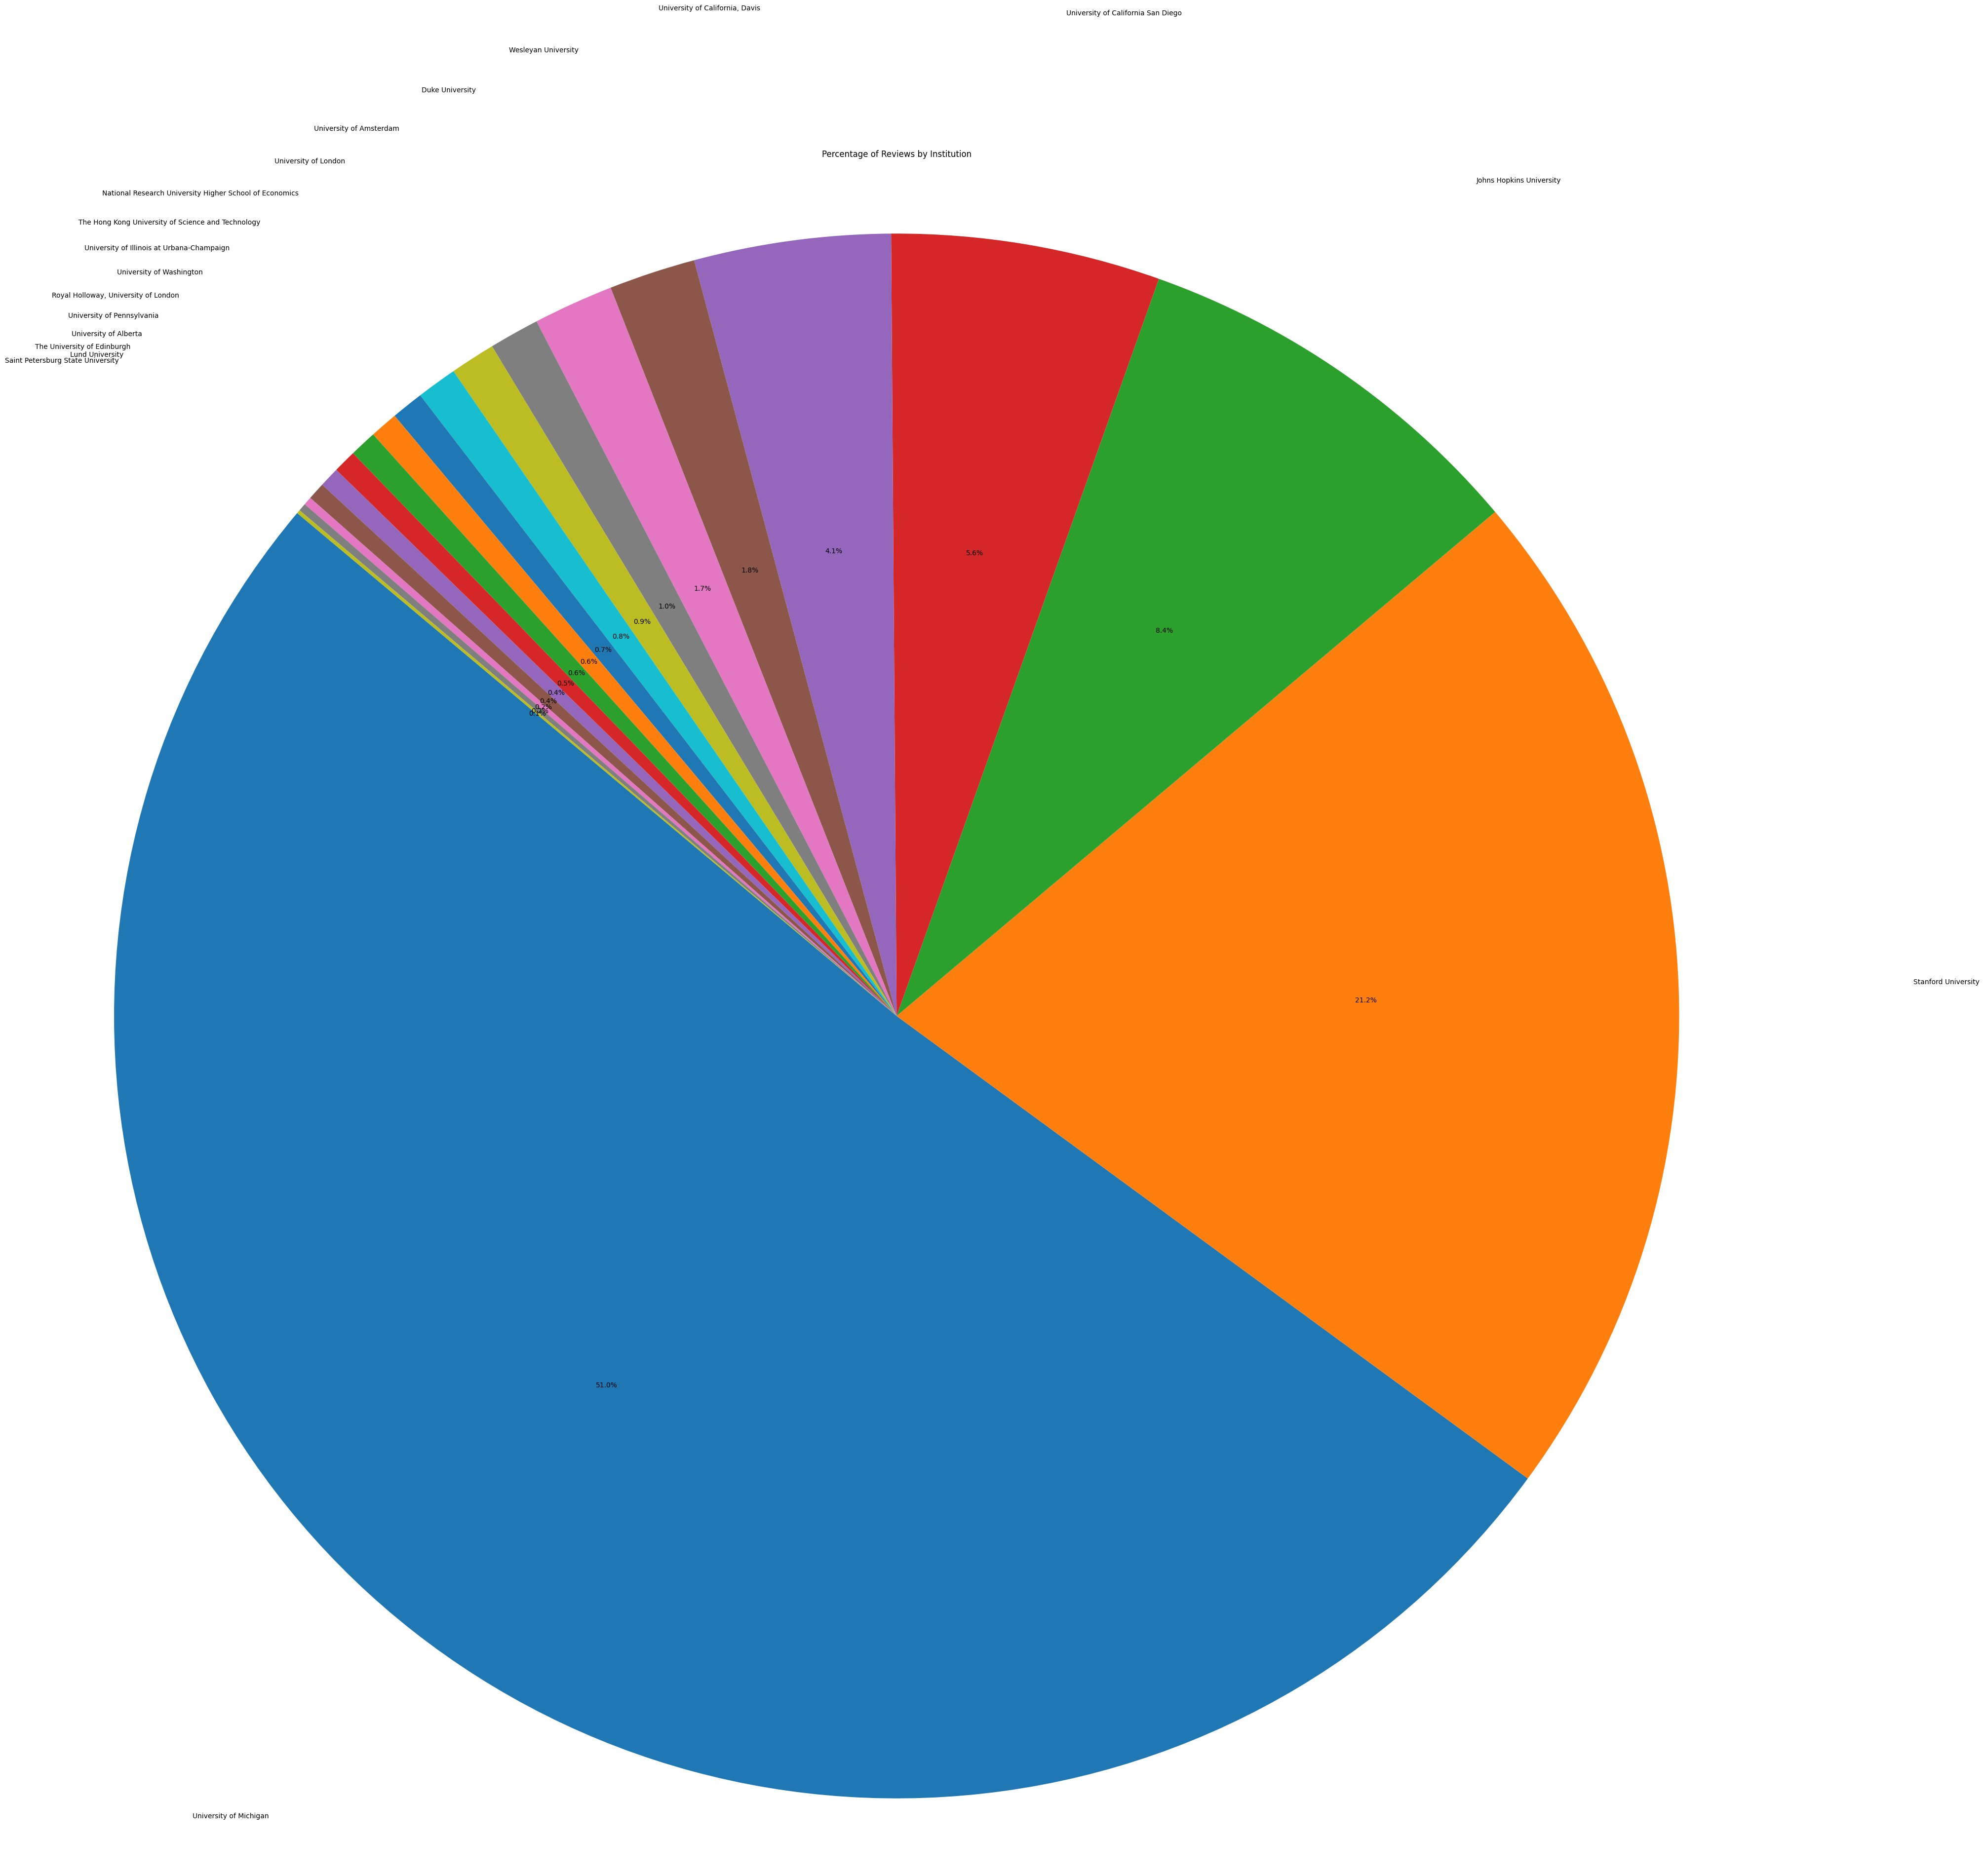

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# List of university institutions
institutions = [
    'University of Michigan', 'University of Pennsylvania', 
    'University of California, Davis', 'Johns Hopkins University', 
    'University of Illinois at Urbana-Champaign', 'University of London',
    'University of California San Diego', 'The Hong Kong University of Science and Technology',
    'Duke University', 'University of Amsterdam', 
    'National Research University Higher School of Economics',
    'Wesleyan University', 'University of Alberta', 
    'Royal Holloway, University of London', 'University of Washington',
    'Saint Petersburg State University', 'Lund University', 
    'The University of Edinburgh', 'Stanford University'
]

# Count occurrences of each institution
institution_counts = df_cleaned['institution'].value_counts()

# Filter counts for specified institutions
filtered_counts = institution_counts[institution_counts.index.isin(institutions)]

# Reset index to turn the Series into a DataFrame
filtered_counts = filtered_counts.reset_index()
filtered_counts.columns = ['institution', 'count']

# Plotting the pie chart
plt.figure(figsize=(45, 45))
plt.pie(filtered_counts['count'], 
        labels=filtered_counts['institution'], 
        autopct='%1.1f%%', 
        startangle=140, 
        labeldistance=1.3,
        textprops={'fontsize': 10})  # Increase label distance

plt.title('Percentage of Reviews by Institution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


In [61]:
df_universities

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
432919  Great for beginners in programming and people ...   2020-10-08   
432920  nice hope Charles sir gonna come up with more ...   2020-10-08   
432925  This course is so good. I can easily understan...   2020-10-06   
432931  Love it! Even though it isn't my first python ...   2020-10-06   
432932  Really good introduction to python! This progr...   2020-10-06   

        rating course_id    month       departments  \
0            1    python  2017-10  Computer Science   
1            1    python  2017-08  Computer Science   
2            1    python  2019-03  Computer Science   
3            1    python  2015-10  Computer Science   
4            1    python  2016-05  Computer Science   
...        ...       ...      ...               ...   
432919       5    python  2020-10  Computer Science   
432920       5    python  2020-10  Computer Science   
432925       5    python  2020-10  Computer Science   
432931       5    python  2020-10  Computer Science   
432932       5    python  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
432919  Programming for Everybody (Getting Started wit...   
432920  Programming for Everybody (Getting Started wit...   
432925  Programming for Everybody (Getting Started wit...   
432931  Programming for Everybody (Getting Started wit...   
432932  Programming for Everybody (Getting Started wit...   

                   institution  
0       University of Michigan  
1       University of Michigan  
2       University of Michigan  
3       University of Michigan  
4       University of Michigan  
...                        ...  
432919  University of Michigan  
432920  University of Michigan  
432925  University of Michigan  
432931  University of Michigan  
432932  University of Michigan  

[58729 rows x 8 columns]

# Preprocessing the 'reviews' column for building model, opining mining, topic modelling #

In [62]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')        # For tokenization
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # For WordNet data

[nltk_data] Downloading package stopwords to
[nltk_data]     /dcs/22/u2223506/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /dcs/22/u2223506/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /dcs/22/u2223506/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /dcs/22/u2223506/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Minimum preprocessing for all tasks using both traditional and finetuning approaches for labelling. I will probably try using pre-trained models first, then finetuning, since it's slightly easier than from scratch since they have their own specialised tokenization and text preprocessing mechanisms. But based on research, will definitely have to try SVM and KNN and I aim to provide a comparison on both methods (trad. vs. pretrained).

In [63]:
# Create the new dataframe for sentiment analysis
df_cleaned_min_preprocessing = df_cleaned.copy()

# Add the preprocessed_text column with all the preprocessing steps applied
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['reviews'].copy()

# Convert to lowercase
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].str.lower()

# Remove punctuation
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove numbers and URLs
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].str.replace(r'\d+', '', regex=True)
# df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Remove extra whitespace
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].str.strip()
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].replace(r'\s+', ' ', regex=True)

# Expand contractions
import contractions
df_cleaned_min_preprocessing['preprocessed_text'] = df_cleaned_min_preprocessing['preprocessed_text'].apply(lambda x: contractions.fix(x))

df_cleaned_min_preprocessing

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
433275         A very good course, I highly recommend it!   2020-10-07   
433287            great course with a lot of information.   2020-10-10   
433290               the hardest one but very interrsting   2020-10-08   
433293                       Awesome course to take!!!!!!   2020-10-07   
433296                           Excellent course incite!   2020-10-06   

        rating            course_id    month       departments  \
0            1               python  2017-10  Computer Science   
1            1               python  2017-08  Computer Science   
2            1               python  2019-03  Computer Science   
3            1               python  2015-10  Computer Science   
4            1               python  2016-05  Computer Science   
...        ...                  ...      ...               ...   
433275       5  computer-networking  2020-10  Computer Science   
433287       5  computer-networking  2020-10  Computer Science   
433290       5  computer-networking  2020-10  Computer Science   
433293       5  computer-networking  2020-10  Computer Science   
433296       5  computer-networking  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
433275          The Bits and Bytes of Computer Networking   
433287          The Bits and Bytes of Computer Networking   
433290          The Bits and Bytes of Computer Networking   
433293          The Bits and Bytes of Computer Networking   
433296          The Bits and Bytes of Computer Networking   

                   institution  \
0       University of Michigan   
1       University of Michigan   
2       University of Michigan   
3       University of Michigan   
4       University of Michigan   
...                        ...   
433275                  Google   
433287                  Google   
433290                  Google   
433293                  Google   
433296                  Google   

                                        preprocessed_text  
0       i did not find this course helpful the assignm...  
1       i got a and maybe i learned something but i ca...  
2       two weeks of all sort of nonsense including ma...  
3       we tried to use this class to teach a brown ba...  
4       to be honest i thought the course stumbled and...  
...                                                   ...  
433275           a very good course i highly recommend it  
433287             great course with a lot of information  
433290               the hardest one but very interrsting  
433293                             awesome course to take  
433296                            excellent course incite  

[127126 rows x 9 columns]

In [64]:
df_cleaned_min_preprocessing.to_csv('~/cs310/datasets/data_cleaned_minimum.csv', index=False)

# Saving minimal processed university reviews only #

In [65]:
# Create the new dataframe for sentiment analysis
df_universities_min_preprocessing = df_universities.copy()

# Add the preprocessed_text column with all the preprocessing steps applied
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['reviews'].copy()

# Convert to lowercase
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].str.lower()

# Remove punctuation
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].str.replace(r'[^\w\s]', '', regex=True)

# Remove numbers and URLs
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].str.replace(r'\d+', '', regex=True)
# df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].str.replace(r'http\S+|www.\S+', '', regex=True)

# Remove extra whitespace
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].str.strip()
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].replace(r'\s+', ' ', regex=True)

# Expand contractions
import contractions
df_universities_min_preprocessing['preprocessed_text'] = df_universities_min_preprocessing['preprocessed_text'].apply(lambda x: contractions.fix(x))

df_universities_min_preprocessing

reviews date_reviews  \
0       I did not find this course helpful. The assign...   2017-10-05   
1       I got a 95% and maybe I learned something but ...   2017-08-06   
2       Two weeks of all sort of nonsense, including m...   2019-03-28   
3       We tried to use this class to teach a brown ba...   2015-10-20   
4       To be honest, I thought the course stumbled an...   2016-05-11   
...                                                   ...          ...   
432919  Great for beginners in programming and people ...   2020-10-08   
432920  nice hope Charles sir gonna come up with more ...   2020-10-08   
432925  This course is so good. I can easily understan...   2020-10-06   
432931  Love it! Even though it isn't my first python ...   2020-10-06   
432932  Really good introduction to python! This progr...   2020-10-06   

        rating course_id    month       departments  \
0            1    python  2017-10  Computer Science   
1            1    python  2017-08  Computer Science   
2            1    python  2019-03  Computer Science   
3            1    python  2015-10  Computer Science   
4            1    python  2016-05  Computer Science   
...        ...       ...      ...               ...   
432919       5    python  2020-10  Computer Science   
432920       5    python  2020-10  Computer Science   
432925       5    python  2020-10  Computer Science   
432931       5    python  2020-10  Computer Science   
432932       5    python  2020-10  Computer Science   

                                                     name  \
0       Programming for Everybody (Getting Started wit...   
1       Programming for Everybody (Getting Started wit...   
2       Programming for Everybody (Getting Started wit...   
3       Programming for Everybody (Getting Started wit...   
4       Programming for Everybody (Getting Started wit...   
...                                                   ...   
432919  Programming for Everybody (Getting Started wit...   
432920  Programming for Everybody (Getting Started wit...   
432925  Programming for Everybody (Getting Started wit...   
432931  Programming for Everybody (Getting Started wit...   
432932  Programming for Everybody (Getting Started wit...   

                   institution  \
0       University of Michigan   
1       University of Michigan   
2       University of Michigan   
3       University of Michigan   
4       University of Michigan   
...                        ...   
432919  University of Michigan   
432920  University of Michigan   
432925  University of Michigan   
432931  University of Michigan   
432932  University of Michigan   

                                        preprocessed_text  
0       i did not find this course helpful the assignm...  
1       i got a and maybe i learned something but i ca...  
2       two weeks of all sort of nonsense including ma...  
3       we tried to use this class to teach a brown ba...  
4       to be honest i thought the course stumbled and...  
...                                                   ...  
432919  great for beginners in programming and people ...  
432920  nice hope charles sir going to come up with mo...  
432925  this course is so good i can easily understand...  
432931  love it even though it is not my first python ...  
432932  really good introduction to python this progra...  

[58729 rows x 9 columns]

In [66]:
df_cleaned_min_preprocessing.to_csv('~/cs310/datasets/data_cleaned_minimum_universities.csv', index=False)

The data in data_cleaned_minimum_universities will be used for labelling and further processing and analysis.